In [1]:
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver
import time
import csv
from geopy.geocoders import Nominatim

In [2]:
# ---GLOBAL VARIABLES---
neighborhood_safety_ratings = {"new+york-ny": {"letter_rating": "F", "chance_of_being_victim_perc": 2.1276595745,
                                               "yearly_crime_in_location_per_100k": 177320,
                                               "neighborhood_found": "new york"}}
letter_ratings_translator = {'A+': 100, 'B+': 85, 'C+': 70, 'D+': 55, 'E+': 40, 'G+': 25, 'F+': 10,
                             'A': 95, 'B': 80, 'C': 65, 'D': 50, 'E': 35, 'G': 20, 'F': 5,
                             'A-': 90, 'B-': 75, 'C-': 60, 'D-': 45, 'E-': 30, 'G-': 15, 'F-': 0, '': 0}

rows_for_csv = []


zips = ['10001', '10002', '10003', '10004', '10005', '10006', '10007', '10009', '10010', '10011', '11235', '10028', '11201',
        '10014', '10015', '10016', '10017', '10018', '10019', '10020', '10021', '10022', '10023', '10024', '10025']
        # '10026', '10027', '10028', '10029', '10030', '10031', '10032', '10033', '10034', '10035', '10036', '10037',
        # '10038', '10039', '10040', '10041', '10044', '10045', '10048', '10055', '10060', '10069', '10090', '10095']
        # '10098', '10099', '10103', '10104', '10105', '10106', '10107', '10110', '10111', '10112', '10115', '10118',
        # '10119', '10120', '10121', '10122', '10123', '10128', '10151', '10152', '10153', '10154', '10155', '10158',
        # '10161', '10162', '10165', '10166', '10167', '10168', '10169', '10170', '10171', '10172', '10173', '10174',
        # '10175', '10176', '10177', '10178', '10199', '10270', '10271', '10278', '10279', '10280', '10281', '10282',
        # '10301', '10302', '10303', '10304', '10305', '10306', '10307', '10308', '10309', '10310', '10311', '10312']
        # '10314', '10451', '10452', '10453', '10454', '10455', '10456', '10457', '10458', '10459', '10460', '10461',
        # '10462', '10463', '10464', '10465', '10466', '10467', '10468', '10469', '10470', '10471', '10472', '10473',
        # '10474', '10475', '11004', '11101', '11102', '11103', '11104', '11105', '11106', '11109', '11201', '11203',
        # '11204', '11205', '11206', '11207', '11208', '11209', '11210', '11211', '11212', '11213', '11214', '11215',
        # '11216', '11217', '11218', '11219', '11220', '11221', '11222', '11223', '11224', '11225', '11226', '11228',
        # '11229', '11230', '11231', '11232', '11233', '11234', '11235', '11236', '11237', '11238', '11239', '11241',
        # '11242', '11243', '11249', '11252', '11256', '11351', '11354', '11355', '11356', '11357', '11358', '11359',
        # '11360', '11361', '11362', '11363', '11364', '11365', '11366', '11367', '11368', '11369', '11370', '11371',
        # '11372', '11373', '11374', '11375', '11377', '11378', '11379', '11385', '11411', '11412', '11413', '11414',
        # '11415', '11416', '11417', '11418', '11419', '11420', '11421', '11422', '11423', '11426', '11427', '11428',
        # '11429', '11430', '11432', '11433', '11434', '11435', '11436', '11691', '11692', '11693', '11694', '11697',
        # '10451', '10452', '10453', '10454', '10455', '10456', '10457', '10458', '10459', '10460', '10461', '10462',
        # '10463', '10464', '10465', '10466', '10467', '10468', '10469', '10470', '10471', '10472', '10473', '10474',
        # '10475', '11201', '11203', '11204', '11205', '11206', '11207', '11208', '11209', '11210', '11211', '11212',
        # '11213', '11214', '11215', '11216', '11217', '11218', '11219', '11220', '11221', '11222', '11223', '11224',
        # '11225', '11226', '11228', '11229', '11230', '11231', '11232', '11233', '11234', '11235', '11236', '11237',
        # '11238', '11239', '11241', '11242', '11243', '11249', '11252', '11256', '10001', '10002', '10003', '10004',
        # '10005', '10006', '10007', '10009', '10010', '10011', '10012', '10013', '10014', '10015', '10016', '10017',
        # '10018', '10019', '10020', '10021', '10022', '10023', '10024', '10025', '10026', '10027', '10028', '10029',
        # '10030', '10031', '10032', '10033', '10034', '10035', '10036', '10037', '10038', '10039', '10040', '10041',
        # '10044', '10045', '10048', '10055', '10060', '10069', '10090', '10095', '10098', '10099', '10103', '10104',
        # '10105', '10106', '10107', '10110', '10111', '10112', '10115', '10118', '10119', '10120', '10121', '10122',
        # '10123', '10128', '10151', '10152', '10153', '10154', '10155', '10158', '10161', '10162', '10165', '10166',
        # '10167', '10168', '10169', '10170', '10171', '10172', '10173', '10174', '10175', '10176', '10177', '10178',
        # '10199', '10270', '10271', '10278', '10279', '10280', '10281', '10282', '11101', '11102', '11103', '11004',
        # '11104', '11105', '11106', '11109', '11351', '11354', '11355', '11356', '11357', '11358', '11359', '11360',
        # '11361', '11362', '11363', '11364', '11365', '11366', '11367', '11368', '11369', '11370', '11371', '11372',
        # '11373', '11374', '11375', '11377', '11378', '11379', '11385', '11411', '11412', '11413', '11414', '11415',
        # '11416', '11417', '11418', '11419', '11420', '11421', '11422', '11423', '11426', '11427', '11428', '11429',
        # '11430', '11432', '11433', '11434', '11435', '11436', '11691', '11692', '11693', '11694', '11697', '10301',
        # '10302', '10303', '10304', '10305', '10306', '10307', '10308', '10309', '10310', '10311', '10312', '10314']
        
# -REDFIN-SELENIUM-REQUEST
redfin_url = 'https://www.redfin.com/city/30749/NY/New-York/apartments-for-rent/'
redfin_url_pt1 = 'https://www.redfin.com/zipcode/'
redfin_url_pt2 = '/apartments-for-rent'
redfin_div_list = 'HomeCardContainer defaultSplitMapListView isRentals'
redfin_pages_div = 'clickable goToPage'
redfin_page_num_div = "data-rf-test-id"
redfin_base_url = 'https://www.redfin.com'

# ----SELENIUM----
options = webdriver.ChromeOptions()
options.add_argument('--start-maximized')
options.add_argument('--headless')
driver = webdriver.Chrome(options=options)

In [3]:
# ---get html content from given link---
def get_soup(url):
    driver.get(url)
    time.sleep(2)
    resp = driver.page_source
    soup = BeautifulSoup(resp, features="html.parser")
    return soup


# ---retrieve all page links from main page---
def get_list_of_pages(soup):
    pages_div = soup.find_all('div', class_='PagingControls')
    pages = pages_div[0].findAll("a", {"class": lambda l: l and l.endswith(redfin_pages_div)}) if check_not_null(
        pages_div) else []
    return pages


# ---retrieve links for all apartments on page---
def get_apt_links(soup):
    apartment_links = []
    apt_lst = soup.find_all('div', class_=redfin_div_list)
    for apt in apt_lst:
        apartment_links.append(apt.find('a')['href'])
    return apartment_links

In [4]:
# ---checks BS4 returned tags for null
def check_not_null(tag):
    if len(tag) > 0 and tag is not None:
        return True
    else:
        return False

In [5]:
# ---retrieve all data on given apartment from redfin---
def extract_data_from_apt_page(url, id):
    apt_soup = get_soup(url)
    # ---get apartment info---

    # GET TABS
    tab_extraction_div = apt_soup.find_all('ul', class_='TabBar__list')
    tab_extraction = tab_extraction_div[0].find_all(
        'li',
        class_=lambda x: x and (x.startswith('TabBar__list-item') or x.startswith("TabBarItem"))) if check_not_null(
        tab_extraction_div) else ''
    if tab_extraction == '':
        return []
    tabs = []
    for tab in tab_extraction:
        tabs.append(tab.text)

    overview_res, safety_res, floor_plans_res, fees_res_1, fees_res_2, amenities_res_1, amenities_res_2, schools_res, school_rating_avg, nearby_res_1, nearby_res_2, about_res = \
        {}, {}, {}, {}, {}, {}, {}, {}, 0, {}, {}, {}
    apt_id = id
    neighborhood_found = 'new york'
    rows_for_csv_output = []
    new_row = []

    if 'Overview' in tabs:
#         print("---OVERVIEW---")
        print(apt_id)
        overview_res = extract_overview(apt_soup)
#         print(overview_res)
#         print("---SAFETY---")
        safety_res = extract_safety_rating(overview_res['neighborhood'])
#         print(safety_res)

        if safety_res["neighborhood_found"] != 'new york':
            neighborhood_found = safety_res["neighborhood_found"]
        elif overview_res['neighborhood'][0] != 'Invalid address':
            neighborhood_found = overview_res['neighborhood'][0]
#         print(neighborhood_found)

        new_row.extend([
            apt_id, overview_res['place'], overview_res['street'], overview_res['city'], overview_res['state'],
            overview_res['zip'],
            overview_res['neighborhood'], neighborhood_found, overview_res['price_per_mon'],
            overview_res['num_of_beds'], overview_res['num_of_baths'], overview_res['size_sqrft'],
            letter_ratings_translator[safety_res['letter_rating']], safety_res['chance_of_being_victim_perc'],
            safety_res['yearly_crime_in_location_per_100k']]
        )
    else:
        new_row.extend([id, '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''])
    if 'Fees' in tabs:
#         print("---FEES---")
        fees_res_1, fees_res_2 = extract_fees(apt_soup)
#         print(f'{fees_res_1} ||| {fees_res_2}')

        new_row.extend([
            fees_res_2['Pets'], fees_res_2['Parking']
        ])
    else:
        new_row.extend([0, 0])
    if 'Amenities' in tabs:
#         print("---AMENITIES---")
        amenities_res_1, amenities_res_2 = extract_amenities(apt_soup)
#         print(f'{amenities_res_1} ||| {amenities_res_2}')

        new_row.extend([
            amenities_res_2['balcony'], amenities_res_2['smoke free'],
            amenities_res_2['patio'], amenities_res_2['island kitchens'], amenities_res_2['refrigerator'],
            amenities_res_2['microwave'], amenities_res_2['dishwasher'], amenities_res_2['deck'],
            amenities_res_2['cable ready'], amenities_res_2['view'], amenities_res_2['extra storage'],
            amenities_res_2['fitness center'], amenities_res_2['laundry facility'],
            amenities_res_2['high speed internet access'], amenities_res_2['swimming pool'],
            amenities_res_2['ev charging stations'], amenities_res_2['washer & dryer in unit'],
            amenities_res_2['stainless steel appliances'], amenities_res_2['green community'],
            amenities_res_2['hardwood flooring'], amenities_res_2['emergency maintenance'],
            amenities_res_2['short term available'], amenities_res_2['garbage disposal'], amenities_res_2['gas range'],
            amenities_res_2['public transportation']
        ])
    else:
        new_row.extend([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
    if 'Schools' in tabs:
#         print("---SCHOOLS---")
        schools_res, school_rating_avg = extract_schools(apt_soup)
#         print(f'{schools_res} ||| {school_rating_avg}')

        new_row.extend([
            len(schools_res), school_rating_avg
        ])
    else:
        new_row.extend(['', ''])
#     print("---NEARBY---")
    nearby_res_1, nearby_res_2 = extract_nearby(apt_soup)
#     print(f'{nearby_res_1} ||| {nearby_res_2}')

    if len(nearby_res_1) > 0:
        new_row.extend([
            nearby_res_1['walkscore'].split('/')[0], nearby_res_1['bikescore'].split('/')[0],
            nearby_res_1['transitscore'].split('/')[0]
        ])
    if len(nearby_res_2) > 0:
        new_row.extend([
            nearby_res_2['groceries'] if 'groceries' in nearby_res_2.keys() else nearby_res_2['grocery'],
            nearby_res_2['restaurants'] if 'restaurants' in nearby_res_2.keys() else nearby_res_2['restaurant'],
            nearby_res_2['parks'] if 'parks' in nearby_res_2.keys() else nearby_res_2['park']
        ])

    if nearby_res_1 == {}:
        new_row.extend(['', '', ''])
    if nearby_res_2 == {}:
        new_row.extend(['', '', ''])

#     print("---ABOUT---")
    about_res = extract_about(apt_soup)

    new_row.extend([len(about_res)])
#     print(about_res)

    if new_row[8] == 'Contact for Price':
        new_row[8] = ''
    rows_for_csv_output.append(new_row)
    # ADD MORE APARTMENT OPTIONS
    if 'Floor Plans' in tabs:
#         print("---FLOOR PLANS---")
        floor_plans_res = extract_floor_plans(apt_soup)
#         print(floor_plans_res)

        for plan in floor_plans_res:
            copy_new_row = []
            copy_new_row.extend(new_row)
            copy_new_row[8] = plan['price']
            copy_new_row[9] = plan['num_of_beds']
            copy_new_row[10] = plan['num_of_baths']
            copy_new_row[11] = plan['sqrft']

            if copy_new_row[8] == 'Contact for Price':
                copy_new_row[8] = ''
            rows_for_csv_output.append(copy_new_row)

    # rows_for_csv_output = [apt_id, overview_res['place'], overview_res['street'], overview_res['city'], overview_res['state'], overview_res['zip'],
    #                        overview_res['neighborhood'], neighborhood_found, overview_res['price_per_mon'], overview_res['num_of_beds'], overview_res['num_of_baths'], overview_res['size_sqrft'],
    #                        letter_ratings_translator[safety_res['letter_rating']], safety_res['chance_of_being_victim_perc'], safety_res['yearly_crime_in_location_per_100k'],
    #                        fees_res_2['Pets'], fees_res_2['Parking'],
    #                        amenities_res_2['balcony'], amenities_res_2['cable ready'], amenities_res_2['smoke free'],
    #                        amenities_res_2['patio'], amenities_res_2['island kitchens'], amenities_res_2['refrigerator'],
    #                        amenities_res_2['microwave'], amenities_res_2['dishwasher'], amenities_res_2['deck'],
    #                        amenities_res_2['cable ready'], amenities_res_2['view'], amenities_res_2['extra storage'],
    #                        amenities_res_2['fitness center'], amenities_res_2['laundry facility'],
    #                        amenities_res_2['high speed internet access'], amenities_res_2['swimming pool'],
    #                        amenities_res_2['ev charging stations'], amenities_res_2['washer & dryer in unit'],
    #                        amenities_res_2['stainless steel appliances'], amenities_res_2['green community'],
    #                        len(schools_res), school_rating_avg,
    #                        nearby_res_1['walkscore'].split('/')[0], nearby_res_1['bikescore'].split('/')[0], nearby_res_1['transitscore'].split('/')[0],
    #                        nearby_res_2['groceries'], nearby_res_2['restaurants'],
    #                        nearby_res_2['parks'] if 'parks' in nearby_res_2.keys() else nearby_res_2['park'],
    #                        len(about_res)]

#     print(rows_for_csv_output)

    return rows_for_csv_output

In [6]:
def extract_overview(apt_soup):
    return_set = {}
    # GET DEAL INFO

    # GET TOP HOME INFO
    home_info = apt_soup.find_all('div', class_='HomeInfoV2')
    if not check_not_null(home_info):
        home_info = apt_soup.find_all('div', class_='bp-HomeInfoV2')
    # GET ADDRESS
    place_div = home_info[0].find_all('h1', class_='property-header')
    place = place_div[0].text if check_not_null(place_div) else ''

    address_street_div = home_info[0].find_all('div', class_='street-address')
    address_street = address_street_div[0].text.replace(",", "") if check_not_null(address_street_div) else ''

    address_city_state_zip_div = home_info[0].find_all('div', {"data-rf-test-id": "abp-cityStateZip"})
    address_city_state_zip = address_city_state_zip_div[0].text.split(",") if check_not_null(
        address_city_state_zip_div) else ''

    if address_city_state_zip != '':
        address_city_div = address_city_state_zip[0]
        address_city = address_city_div.replace(",", "") if check_not_null(address_city_div) else ''

        address_state_zip_div = address_city_state_zip[1]
        address_state_zip = address_state_zip_div.strip() if check_not_null(address_state_zip_div) else ''

        address_state = address_state_zip.split(" ")[0] if check_not_null(address_state_zip.split(" ")[0]) else ''
        address_zip = address_state_zip.split(" ")[1] if check_not_null(address_state_zip.split(" ")[1]) else ''
        address_neighborhood = get_neighborhood(address_street + ', ' + address_zip)
        if address_neighborhood[0] == "Invalid address":
            address_neighborhood = get_neighborhood(address_street)
    else:
        address_city, address_state, address_zip, address_neighborhood = '', '', '', ''

    # GET HOME STATS
    main_home_stats = home_info[0].find_all('div', class_='home-main-stats-variant')
    try:
        stats_price_per_month = \
            main_home_stats[0].find_all('div', {"data-rf-test-id": "abp-price"})[0].find_all('div',
                                                                                             class_='statsValue')[
                0].text
        stats_price_per_month = stats_price_per_month.replace('$', '').split('+')[0].split('/')[0]
    except IndexError:
        stats_price_per_month = -1
    try:
        stats_num_beds = \
            main_home_stats[0].find_all('div', {"data-rf-test-id": "abp-beds"})[0].find_all('div', class_='statsValue')[
                0].text
        cheapest_stats_num_beds = stats_num_beds.split("-")[0]
    except IndexError:
        stats_num_beds, cheapest_stats_num_beds = -1
    try:
        stats_num_baths = \
            main_home_stats[0].find_all('div', {"data-rf-test-id": "abp-baths"})[0].find_all('div',
                                                                                             class_='statsValue')[
                0].text
        cheapest_stats_num_baths = stats_num_baths.split('-')[0]
    except IndexError:
        stats_num_baths, cheapest_stats_num_baths = -1
    try:
        stats_size_sqrft = \
            main_home_stats[0].find_all('div', {"data-rf-test-id": "abp-sqFt"})[0].find_all('span',
                                                                                            class_='statsValue')[
                0].text
        if stats_size_sqrft == '—':
            cheapest_stats_size_sqrft = ''
        else:
            cheapest_stats_size_sqrft = stats_size_sqrft.split('-')[0]
    except IndexError:
        stats_size_sqrft, cheapest_stats_size_sqrft = -1
    return_set = {"place": place, "street": address_street, "city": address_city, "state": address_state,
                  "zip": address_zip,
                  "price_per_mon": stats_price_per_month, "num_of_beds": cheapest_stats_num_beds,
                  "num_of_baths": cheapest_stats_num_baths,
                  "size_sqrft": cheapest_stats_size_sqrft, "neighborhood": address_neighborhood}
    return return_set

In [7]:
def extract_floor_plans(apt_soup):
    # GET FLOOR PLANS
    diff_apartment_options = []
    floor_plans_div = apt_soup.find_all('div', class_='floorPlanRow')
    for plan in floor_plans_div:
        name_div = plan.find_all('div', class_='name')
        name = name_div[0].text if check_not_null(name_div) else ''

        price_div = plan.find_all('div', class_='price')
        price = price_div[0].text if check_not_null(price_div) else ''
        price = price.replace('$', '').split('-')[0].split('/')[0]

        details_div = plan.find_all('div', class_='details')
        details = details_div[0].text if check_not_null(details_div) else ''

        num_of_beds, num_of_baths, sqrft = '', '', ''

        details_split = details.split(' · ')

        apt = {'price': '', 'num_of_beds': num_of_beds, 'num_of_baths': num_of_baths, 'sqrft': sqrft}
        for detail in details_split:
            apt['price'] = price
            if 'Bed' in detail:
                num_of_beds = details_split[0].split(' ')[0]
                apt['num_of_beds'] = num_of_beds
            elif 'Bath' in detail:
                num_of_baths = details_split[1].split(' ')[0]
                apt['num_of_baths'] = num_of_baths
            elif 'Sq.Ft.' in detail:
                sqrft = details_split[2].split(' ')[0].split('-')[0]
                apt['sqrft'] = sqrft

        diff_apartment_options.append(apt)

        # print(f'{name}, {price}, {num_of_beds}, {num_of_baths}, {sqrft}')
    return diff_apartment_options

In [8]:
def extract_fees(apt_soup):
    # GET FEES
    # hardcoded_fee_blocks = ['Pets', 'Parking', 'Lease']
    seen_class_blocks = {}
    fee_section = apt_soup.find_all('section', class_='FeesAndPoliciesSection')[0].find_all('div',
                                                                                            class_='sectionContent')
    fees = {}
    for fee in fee_section[0]:
        fee_class = fee['class'][0]
        if len(fee.find_all('h3')) != 0:
            fee_title = fee.find_all('h3')[0].text
            seen_class_blocks[fee_class] = fee_title
        else:
            if fee_class in seen_class_blocks.keys():
                fee_title = seen_class_blocks[fee_class] + "_" + str(list(fee_section[0]).index(fee))
            else:
                fee_title = ''
        fees[fee_title] = []
        fee_p = fee.find_all('p')
        for p in fee_p:
            if p.text != '':
                fees[fee_title].append(p.text)
    # parking, pets = False, False
    parking, pets = 0, 0
    if 'Parking' in fees:
        # parking = True
        parking = 1
    if 'Dogs Welcome' in fees or 'Cats Welcome' in fees:
        # pets = True
        pets = 1
    fees_2 = {'Parking': parking, 'Pets': pets}
    return fees, fees_2

In [9]:
def extract_amenities(apt_soup):
    # GET AMENITIES

    # hot_amenities = {'balcony': False, 'cable ready': False, 'smoke free': False, 'patio': False, 'island kitchens': False, 'refrigerator': False, 'microwave': False,
    #                  'dishwasher': False, 'deck': False, 'view': False, 'extra storage': False, 'fitness center': False, 'laundry facility': False,
    #                  'high speed internet access': False, 'swimming pool': False, 'ev charging stations': False, 'washer & dryer in unit': False,
    #                  'stainless steel appliances': False, 'green community': False}
    hot_amenities = {'balcony': 0, 'smoke free': 0, 'patio': 0, 'island kitchens': 0,
                     'refrigerator': 0, 'microwave': 0,
                     'dishwasher': 0, 'deck': 0, 'cable ready': 0, 'view': 0, 'extra storage': 0, 'fitness center': 0,
                     'laundry facility': 0,
                     'high speed internet access': 0, 'swimming pool': 0, 'ev charging stations': 0,
                     'washer & dryer in unit': 0,
                     'stainless steel appliances': 0, 'green community': 0, 'hardwood flooring': 0,
                     'emergency maintenance': 0,
                     'short term available': 0, 'garbage disposal': 0, 'gas range': 0, 'public transportation': 0}
    amenities_rows = apt_soup.find_all('section', class_='AmenitiesSection')[0].find_all('ul',
                                                                                         class_='listed-amenities')
    amenities = []
    for amenities_list in amenities_rows:
        for item in amenities_list:
            amenities.append(item.text.lower())
    for hot_amenity in hot_amenities.keys():
        if hot_amenity in amenities:
            # hot_amenities[hot_amenity] = True
            hot_amenities[hot_amenity] = 1

    return amenities, hot_amenities

In [10]:
def extract_schools(apt_soup):
    # GET SCHOOLS
    school_ratings = []
    school_info = {}
    school_html_type_new = False  # Supporting newer html on redfin site
    schools = apt_soup.find_all('div', class_='school-card-component')
    if not check_not_null(schools):
        school_html_type_new = True
        schools_content_div = apt_soup.find_all('div', class_='schools-content')
        schools = schools_content_div[0].find_all('div', class_='ListItem') if check_not_null(
            schools_content_div) else []

    for school in schools:
        if school_html_type_new:
            school_name_div = school.find_all('h3', class_='ListItem__heading')
        else:
            school_name_div = school.find_all('div', class_='school-name')
        school_name = school_name_div[0].text if check_not_null(school_name_div) else ''

        school_rating_div = school.find_all('span', class_='rating-num')
        school_rating = school_rating_div[0].text if check_not_null(school_name_div) else ''

        school_rating_out_of_div = school.find_all('span', class_='out-of')
        school_rating_out_of = school_rating_out_of_div[0].text if check_not_null(school_rating_out_of_div) else ''

        school_info[school_name] = f'{school_rating.replace(" ", "")}{school_rating_out_of.replace(" ", "")}'

        # average school rating in area
        try:
            rating = (int(school_rating) / int(school_rating_out_of.split('/')[1])) * 100
        except:
            rating = 0
        school_ratings.append(rating)
    if check_not_null(school_ratings):
        rating_avg = f'{(sum(school_ratings) / len(school_ratings)):.2f}'
    else:
        rating_avg = 0

    return school_info, rating_avg


In [11]:
def extract_nearby(apt_soup):
    # GET NEARBY
    transport_score = {"walkscore": '', "bikescore": '', "transitscore": ''}
    neighborhood = apt_soup.find_all('div', {"data-rf-test-id": "neighborhoodSection"})
    try:
        walk_score_divs = neighborhood[0].find_all('div', class_='walk-score')[0].find_all('div', class_='score')
    except IndexError:
        walk_score_divs = []
    for div in walk_score_divs:
        name = div.find_all('div')[0]['class'][1]
        value = div.find_all('div', class_='percentage')[0].find('span', class_='value').text
        total = div.find_all('div', class_='percentage')[0].find('span', class_='total').text
        transport_score[name] = f'{value.replace(" ", "")}{total.replace(" ", "")}'

    points_of_interest = {"groceries": 0, "restaurants": 0, "parks": 0}
    try:
        points_divs = apt_soup.find_all('div', class_='PointOfInterestExpandable')[0].find('div', class_='content').text
        for point in points_divs.split(', '):
            points_of_interest[point.split(' ')[1]] = point.split(' ')[0]
    except IndexError:
        points_divs = ''
    return transport_score, points_of_interest

In [12]:
def extract_about(apt_soup):
    key_words = ["sundeck", "patio", "concierge", "laundry", "bike storage", "balcony", "no broker fees", "view",
                 "views",
                 "dry cleaning", "environmentally-friendly", "green", "sky decks", "pet-friendly", "rooftop", "wi-fi",
                 "saftey", "cable tv", "pool", "fitness center", "yoga studio"]
    found_key_words = []

    about_text_div = apt_soup.find_all('p', class_='AboutThisHome-Description')
    about_text = about_text_div[0].text.lower() if check_not_null(about_text_div) else ''
    for word in key_words:
        if word in about_text:
            found_key_words.append(word)
    return found_key_words

In [13]:
def get_neighborhood(address):
    address = address.split('Unit')[0].strip()
    geolocator = Nominatim(user_agent="location_app")
    try:
        location = geolocator.geocode(address, addressdetails=True)
    except:
        location = ''

    if location:
        address = location.raw['address']
        neighborhood = address.get('neighbourhood')
        suburb = address.get('suburb')
        city_district = address.get('city_district')
        town = address.get('town')

        data = [neighborhood, suburb, city_district, town]
        neighborhoods = []
        for i in data:
            if i is not None:
                if i == "Hell's Kitchen":  # Safety website doesnt recognize the nieghborhood by this name
                    i = "Clinton"
                neighborhoods.append(i.lower().strip().replace("'", ""))
        if len(neighborhoods) == 0:
            return ["Invalid address"]
        return neighborhoods
    else:
        return ["Invalid address"]

In [14]:
# ---retrieve data on given apartment from external---
def extract_safety_rating(neighborhoods):
    return_set = {
        "letter_rating": '',
        "chance_of_being_victim_perc": '',
        "yearly_crime_in_location_per_100k": '',
        "neighborhood_found": ''
    }
    if neighborhoods[0] == "Invalid address":
        return_set = neighborhood_safety_ratings["new+york-ny"]
        return return_set
    for neighborhood in neighborhoods:
        if neighborhood in neighborhood_safety_ratings.keys():
            return neighborhood_safety_ratings[neighborhood]
        else:
            double_word_neighborhood = neighborhood.replace(" ", "+")

            url = "https://www.areavibes.com/new+york-ny/" + double_word_neighborhood + '/crime'
#             print(url)
            try:
                apt_soup = get_soup(url)
                letter_rating = apt_soup.find_all('div', class_='sfs__score')[0].text.strip()
                chance_of_being_victim = apt_soup.find_all('div', class_='chance-item tc')[0].find_all('span')[
                    1].text.strip().split(" ")
                chance_of_being_victim_perc = int(chance_of_being_victim[0]) / int(chance_of_being_victim[2]) * 100
                yearly_crime_in_location = \
                    apt_soup.find_all('div', class_='table-overflow-container')[0].find_all('tr', class_='summary')[0]
                yearly_crime_in_location_per_100k = yearly_crime_in_location.find_all('td')[2].text.split(" ")[0]
                return_set = {
                    "letter_rating": letter_rating,
                    "chance_of_being_victim_perc": chance_of_being_victim_perc,
                    "yearly_crime_in_location_per_100k": yearly_crime_in_location_per_100k,
                    "neighborhood_found": neighborhood
                }
                neighborhood_safety_ratings[neighborhood] = return_set
                return return_set
            except:
#                 print(f'{neighborhood} isnt working. Lets try another.')
                pass

    return_set = neighborhood_safety_ratings["new+york-ny"]
    return return_set

In [15]:
def create_df_from_apartments():
    df = pd.DataFrame(rows_for_csv, columns=['id', 'place', 'street', 'city', 'state', 'zip', 'neighborhood', 'neighborhood_found', 'price_per_month',
               'num_of_beds', 'num_of_baths', 'size_sqrft',
               'saftey_rating', 'chance_of_being_victim_percent', 'yearly_crime_per_100k',
               'pets', 'parking',
               'balcony', 'smoke free', 'patio', 'island kitchens', 'refrigerator', 'microwave',
               'dishwasher', 'deck', 'cable ready', 'view', 'extra storage', 'fitness center', 'laundry facility',
               'high speed internet access', 'swimming pool', 'ev charging stations', 'washer & dryer in unit',
               'stainless steel appliances', 'green community', 'hardwood flooring', 'emergency maintenance',
               'short term available', 'garbage disposal', 'gas range', 'public transportation',
               'number_of_close_schools', 'average_school_rating_in_area',
               'walking score', 'biking score', 'public transit score',
               'number_of_close_groceries', 'number_of_close_restaurants', 'number_of_close_parks',
               'num_of_hot_key_words'])
    print('WRITING RESULT TO DATAFRAME.....')
#     for row in rows_for_csv:
#         df.append(row, ignore_index=True)
    return df
    

In [16]:
def write_to_csv_headers():
    headers = ['id', 'place', 'street', 'city', 'state', 'zip', 'neighborhood', 'neighborhood_found', 'price_per_month',
               'num_of_beds', 'num_of_baths', 'size_sqrft',
               'saftey_rating', 'chance_of_being_victim_percent', 'yearly_crime_per_100k',
               'pets', 'parking',
               'balcony', 'smoke free', 'patio', 'island kitchens', 'refrigerator', 'microwave',
               'dishwasher', 'deck', 'cable ready', 'view', 'extra storage', 'fitness center', 'laundry facility',
               'high speed internet access', 'swimming pool', 'ev charging stations', 'washer & dryer in unit',
               'stainless steel appliances', 'green community', 'hardwood flooring', 'emergency maintenance',
               'short term available', 'garbage disposal', 'gas range', 'public transportation',
               'number_of_close_schools', 'average_school_rating_in_area',
               'walking score', 'biking score', 'public transit score',
               'number_of_close_groceries', 'number_of_close_restaurants', 'number_of_close_parks',
               'num_of_hot_key_words']

    with open('data_for_chaim_4.csv', 'a+') as f:
        print('WRITING HEADERS TO FILE.....')
        writer = csv.writer(f)
        writer.writerow(headers)

        
def write_to_csv():
    with open('data_for_chaim_4.csv', 'a+') as f:
        print('WRITING RESULT TO FILE.....')
        writer = csv.writer(f)
        for row in rows_for_csv:
            writer.writerow(row)

In [17]:
def apartment_link_manager():
    all_apt_links = {}
    for zip in zips:
        all_apt_links[zip] = {}
        print(f'STARTING: {zip}')
        link = f'{redfin_url_pt1}{zip}{redfin_url_pt2}'
        main_page = get_soup(link)
        num_of_apt = 0

        pages = get_list_of_pages(main_page)
        if len(pages) > 6:

            # ---get page 1---
            print(f'Loading page 1...')
            apt_links = get_apt_links(main_page)
            for apt in apt_links:
                all_apt_links[zip][apt.split('/')[-1]] = apt
            num_of_apt += len(apt_links)

            # ---get pages 2-9---
            for page in pages:
                page_num = page.text
                print(f'Loading page {page_num}...')
                url = page['href']
                final_page_link = redfin_url + url.split('/')[-1]
                page_soup = get_soup(final_page_link)
                apt_links = get_apt_links(page_soup)
                for apt in apt_links:
                    all_apt_links[zip][apt.split('/')[-1]] = apt
                num_of_apt += len(apt_links)
            print(f'FINISHED: {zip}')
        else:
            print(f'{zip} not big enough')

    # print(f'Number of apartments: {len(all_apt_links)}')
#     print(all_apt_links)
    return all_apt_links


def apartment_extraction_manager(apt_links):
    count = 0
    write_to_csv_headers()
    for zip in apt_links.keys():
        for link in apt_links[zip]:
            count += 1
            final_link = redfin_base_url + apt_links[zip][link]
            print(f'APARTMENT: {link}')
            print(f'Extracting page {final_link} ...')
            print(f'---Apartment number---: {count}')
            new_rows = extract_data_from_apt_page(final_link, apt_links[zip][link].split('/')[-1])
            rows_for_csv.extend(new_rows)
    df = create_df_from_apartments()
    return df

In [18]:
links = apartment_link_manager()
# links = {'177388440': '/NY/New-York/Avalon-Clinton/apartment/177388440', '177389060': '/NY/New-York/Avalon-Morningside-Park/apartment/177389060', '40918467': '/NY/Brooklyn/The-Brooklyner/apartment/40918467', '179550167': '/NY/Queens/Avalon-Riverview/apartment/179550167', '162876279': '/NY/Bronx/Third-at-Bankside/apartment/162876279', '45261341': '/NY/New-York/Avalon-Midtown-West/apartment/45261341', '177408957': '/NY/New-York/777-E-6th-St-10009/apartment/177408957', '177388605': '/NY/Brooklyn/AVA-Fort-Greene/apartment/177388605', '45126991': '/NY/New-York/600-Washington-St-10014/apartment/45126991', '40496755': '/NY/New-York/Murray-Hill-Tower/apartment/40496755', '45124314': '/NY/New-York/180-Riverside-Blvd-10069/apartment/45124314', '90441820': '/NY/New-York/300-E-39th-St-10016/apartment/90441820', '166912769': '/NY/New-York/Parc-East/apartment/166912769', '179446108': '/NY/Brooklyn/Avalon-Brooklyn-Bay/apartment/179446108', '44716519': '/NY/Bronx/1487-Hoe-Ave-10460/home/44716519', '40918890': '/NY/Brooklyn/34-Berry-St-11249/apartment/40918890', '105845821': '/NY/New-York/170-Amsterdam-Ave-10023/apartment/105845821', '45294727': '/NY/New-York/303-E-83rd-St-10028/apartment/45294727', '44748022': '/NY/Bronx/1006-E-241st-St-10466/home/44748022', '45340924': '/NY/New-York/Ten23/apartment/45340924', '177412717': '/NY/New-York/Prism-at-Park-Avenue-South/apartment/177412717', '45248255': '/NY/New-York/Hudson-Crossing/apartment/45248255', '20680133': '/NY/Howard-Beach/15921-95th-St-11414/home/20680133', '177410593': '/NY/Brooklyn/175-Kent-Ave-11249/apartment/177410593', '177360300': '/NY/New-York/The-Westmont/apartment/177360300', '177407207': '/NY/New-York/West-54th/apartment/177407207', '142954279': '/NY/Queens/109-23-71st-Rd-11375/unit-3E/home/142954279', '45267092': '/NY/New-York/Parc-77/apartment/45267092', '177408920': '/NY/New-York/Longacre-House/apartment/177408920', '45236822': '/NY/New-York/71-Broadway-10006/apartment/45236822', '185909129': '/NY/New-York/63-Wall-St-10005/unit-3405/apartment/185909129', '177389244': '/NY/New-York/Avalon-Bowery-Place/apartment/177389244', '181072434': '/NY/Queens/148-36-89th-Ave-11435/apartment/181072434', '179448590': '/NY/New-York/450-W-42nd-St-10036/apartment/179448590', '185909112': '/NY/New-York/601-W-57th-St-10019/unit-35C/apartment/185909112', '181111771': '/NY/New-York/225-Cherry-St-10002/apartment/181111771', '56129999': '/NY/Staten-Island/43-Perkiomen-Ave-10312/home/56129999', '45261502': '/NY/New-York/328-W-49th-St-10019/apartment/45261502', '20666079': '/NY/Long-Island-City/4330-46th-St-11104/home/20666079', '177392206': '/NY/New-York/Charlton-St-10014/apartment/177392206', '56090665': '/NY/Staten-Island/1630-Forest-Hill-Rd-10314/home/56090665', '185909107': '/NY/Brooklyn/1287-E-53rd-St-11234/unit-N-A/home/185909107', '178650491': '/NY/New-York/W-10th-St-10014/unit-1RW/apartment/178650491', '40683865': '/NY/Brooklyn/180-Montague-St-11201/apartment/40683865', '179445407': '/NY/New-York/50-W-34th-St-10001/apartment/179445407', '185901560': '/NY/New-York/230-W-126th-St-10027/unit-23c/apartment/185901560', '45255015': '/NY/New-York/209-E-25th-St-10010/apartment/45255015', '59295122': '/NY/Brooklyn/Atelier/apartment/59295122', '180850977': '/NY/Queens/12-15-Broadway-11106/home/180850977', '45241666': '/NY/New-York/325-E-5th-St-10003/apartment/45241666', '50217530': '/NY/Long-Island-City/4550-Pearson-St-11101/apartment/50217530', '177483009': '/NY/New-York/600-W-42nd-St-10036/apartment/177483009', '40223396': '/NY/Long-Island-City/4310-Crescent-St-11101/apartment/40223396', '105861203': '/NY/New-York/480-Main-St-10044/apartment/105861203', '180755626': '/NY/Long-Island-City/45-80-Pearson-St-11101/apartment/180755626', '178650481': '/NY/New-York/Jane-St-10014/unit-6J/apartment/178650481', '45270497': '/NY/New-York/Parc-Coliseum/apartment/45270497', '45302731': '/NY/New-York/70-W-109th-St-10025/apartment/45302731', '45333100': '/NY/New-York/750-Columbus-Ave-10025/home/45333100', '45340932': '/NY/New-York/Mantena-Apartments/apartment/45340932', '45293057': '/NY/New-York/235-E-81st-St-10028/apartment/45293057', '20913370': '/NY/Flushing/10850-62nd-Dr-11375/home/20913370', '45272364': '/NY/New-York/Parc-Cameron/apartment/45272364', '44777312': '/NY/Bronx/Pelham-Parkway-Towers/apartment/44777312', '185820217': '/NY/New-York/605-W-42nd-St-10036/unit-56V/apartment/185820217', '185761321': '/NY/New-York/63-Wall-St-10005/unit-2810/apartment/185761321', '185876404': '/NY/New-York/344-E-55th-St-10022/unit-1C/apartment/185876404', '44729777': '/NY/Bronx/1521-Unionport-Rd-10462/unit-11H/home/44729777', '184787249': '/NY/New-York/156-E-37th-St-10016/unit-1A/apartment/184787249', '177926441': '/NY/New-York/460-2nd-Ave-10016/apartment/177926441', '185901796': '/NY/New-York/70-Pine-St-10005/unit-2006/apartment/185901796', '183232665': '/NY/Brooklyn/2741-Fulton-St-11207/unit-4D/apartment/183232665', '185590556': '/NY/New-York/70-Pine-St-10005/unit-2702/apartment/185590556', '45276385': '/NY/New-York/27-W-55th-St-10019/home/45276385', '185660322': '/NY/New-York/267-W-47th-St-10036/unit-33F/home/185660322', '185337352': '/NY/New-York/356-W-37th-St-10018/apartment/185337352', '179067234': '/NY/Bronx/745-E-216th-St-10467/unit-2/apartment/179067234', '185909082': '/NY/New-York/620-E-11th-St-10009/unit-B/home/185909082', '184019467': '/NY/New-York/21-W-End-Ave-10023/unit-C19I/home/184019467', '185336698': '/NY/New-York/423-E-83rd-St-10028/unit-1E/apartment/185336698', '181747990': '/NY/New-York/252-E-50th-St-10022/home/181747990', '183932163': '/NY/New-York/555-W-38th-St-10018/unit-5103/home/183932163', '184740024': '/NY/New-York/250-E-Houston-St-10002/unit-PHH/apartment/184740024', '115311509': '/NY/Brooklyn/231-Norman-Ave-11222/unit-509/home/115311509', '45255027': '/NY/New-York/455-2nd-Ave-10010/apartment/45255027', '185149024': '/NY/New-York/47-E-1st-St-10003/unit-4F/apartment/185149024', '185745846': '/NY/Bronx/4499-Henry-Hudson-Pkwy-W-10471/unit-1D/apartment/185745846', '181113163': '/NY/Queens/10420-Queens-Blvd-11375/unit-12G/apartment/181113163', '45306370': '/NY/New-York/230-W-123rd-St-10027/home/45306370', '20669961': '/NY/Far-Rockaway/420-Beach-69th-St-11692/home/20669961', '20868822': '/NY/Flushing/15252-12th-Ave-11357/home/20868822', '185470677': '/NY/New-York/450-W-17th-St-10011/unit-423/home/185470677', '45204960': '/NY/New-York/88-Greenwich-St-10006/unit-910/home/45204960', '185798612': '/NY/New-York/203-1st-Ave-10003/unit-2/apartment/185798612', '185305341': '/NY/New-York/305-E-86th-St-10028/unit-6TE/apartment/185305341', '182439000': '/NY/New-York/850-Amsterdam-Ave-10025/unit-6D/apartment/182439000', '185710499': '/NY/Queens/72-40-66th-St-11385/unit-2/home/185710499', '185745739': '/NY/Bronx/1860-Billingsley-Ter-10453/unit-5L/apartment/185745739', '179333270': '/NY/Brooklyn/70-Weirfield-St-11221/unit-4th/home/179333270', '184231694': '/NY/New-York/212-E-12th-St-10003/unit-5B/apartment/184231694', '177438773': '/NY/New-York/1457-3rd-Ave-10028/apartment/177438773', '185745858': '/NY/Bronx/30-W-181st-St-10453/unit-1B/apartment/185745858', '181296820': '/NY/New-York/156-E-37th-St-10016/unit-2B/apartment/181296820', '185459592': '/NY/New-York/401-E-34th-St-10016/unit-S22B/apartment/185459592', '185909048': '/NY/Queens/159-21-95th-St-11414/unit-2-Fl/home/185909048', '185589622': '/NY/New-York/137-W-82nd-St-10024/unit-3B/apartment/185589622', '183425651': '/NY/New-York/210-E-22nd-St-10010/unit-1H/apartment/183425651', '184536842': '/NY/Brooklyn/794-Logan-St-11208/unit-2/apartment/184536842', '178613227': '/NY/New-York/138-Bowery-10013/home/178613227', '185908339': '/NY/New-York/129-1st-Ave-10009/unit-3B/apartment/185908339', '185734053': '/NY/New-York/225-E-95th-St-10128/unit-D17H/home/185734053', '183561040': '/NY/New-York/377-E-33rd-St-10016/unit-9C/apartment/183561040', '185156283': '/NY/Springfield-Gardens/22612-146th-Ave-11413/unit-1/home/185156283', '184383600': '/NY/New-York/322-E-81st-St-10028/unit-3RW/apartment/184383600', '185348139': '/NY/New-York/211-N-End-Ave-10282/unit-10K/apartment/185348139', '185818722': '/NY/New-York/459-Park-Ave-S-10016/unit-2B/apartment/185818722', '23170464': '/NY/Rockaway-Beach/221-Beach-80th-St-11693/unit-1G/home/23170464', '45309988': '/NY/New-York/446-W-164th-St-10032/apartment/45309988', '185421973': '/NY/New-York/60-Riverside-Blvd-10069/unit-603/home/185421973', '44761552': '/NY/Bronx/6223-Spencer-Ave-10471/home/44761552', '181125999': '/NY/New-York/70-Pine-St-10005/unit-5803/apartment/181125999', '185760681': '/NY/New-York/555-W-38th-St-10018/unit-3603/home/185760681', '181106860': '/NY/New-York/221-E-11th-St-10003/unit-GA/apartment/181106860', '185367554': '/NY/Jamaica/133-15-Hawtree-St-11417/unit-1/home/185367554', '185877334': '/NY/New-York/401-E-34th-St-10016/unit-N26E/apartment/185877334', '179072971': '/NY/New-York/80-Maiden-Ln-10038/unit-4203/home/179072971', '182211935': '/NY/New-York/222-E-39th-St-10016/unit-16A/apartment/182211935', '45299336': '/NY/New-York/2011-5th-Ave-10035/apartment/45299336', '185637793': '/NY/New-York/7-W-21st-St-10010/unit-1502/apartment/185637793', '185900435': '/NY/New-York/3-W-103rd-St-10025/unit-5RW/apartment/185900435', '182542422': '/NY/New-York/25-W-68th-St-10023/unit-7H/apartment/182542422', '45262270': '/NY/New-York/358-W-51st-St-10019/apartment/45262270', '181111493': '/NY/New-York/118-E-102nd-St-10029/unit-D/apartment/181111493', '179066177': '/NY/New-York/564-W-185th-St-10033/unit-5E/apartment/179066177', '179380351': '/NY/New-York/2350-Broadway-10024/unit-401A/apartment/179380351', '45135827': '/NY/New-York/272-W-107th-St-10025/unit-11C/home/45135827', '185649306': '/NY/Brooklyn/2217-Caton-Ave-11226/unit-6C/apartment/185649306', '185517012': '/NY/New-York/304-W-92nd-St-10025/unit-5H/apartment/185517012', '181109609': '/NY/New-York/165-E-87th-St-10128/unit-5FW/apartment/181109609', '185900806': '/NY/New-York/450-W-42nd-St-10036/unit-9E/apartment/185900806', '177983900': '/NY/New-York/250-W-19th-St-10011/unit-5-B/apartment/177983900', '178518279': '/NY/New-York/77-W-15th-St-10011/home/178518279', '185420861': '/NY/New-York/73-E-2nd-St-10003/unit-3-4/home/185420861', '185744629': '/NY/Bronx/4409-Byron-Ave-10466/unit-3/home/185744629', '185411226': '/NY/New-York/332-E-95th-St-10128/unit-7/apartment/185411226', '185891007': '/NY/New-York/17-Stuyvesant-Oval-10009/unit-6-G/home/185891007', '185724216': '/NY/New-York/316-E-49th-St-10017/unit-2C/home/185724216', '185909001': '/NY/Brooklyn/2790-Bragg-St-11235/unit-401/home/185909001', '45263823': '/NY/New-York/406-W-48th-St-10036/apartment/45263823', '181111764': '/NY/New-York/1729-1st-Ave-10128/unit-1D/apartment/181111764', '184534351': '/NY/New-York/1435-1st-Ave-10021/unit-4RS/apartment/184534351', '40824022': '/NY/Brooklyn/1253-Bay-Ridge-Pkwy-11228/home/40824022', '182512787': '/NY/New-York/420-E-80th-St-10075/unit-7M/apartment/182512787', '185517064': '/NY/New-York/41-River-Ter-10282/unit-PHA6/apartment/185517064', '185784689': '/NY/New-York/190-E-7th-St-10009/unit-611/home/185784689', '185818282': '/NY/New-York/535-E-14th-St-10009/unit-9-E/home/185818282', '181125516': '/NY/New-York/219-E-69th-St-10021/unit-6F/apartment/181125516', '179071161': '/NY/Queens/31-76-30th-St-11106/unit-2/apartment/179071161', '181111013': '/NY/New-York/1-Jane-St-10014/unit-1D/apartment/181111013', '183568777': '/NY/New-York/401-E-34th-St-10016/unit-N27E/apartment/183568777', '184428175': '/NY/New-York/550-W-54th-St-10019/unit-1631/apartment/184428175', '45248190': '/NY/New-York/449-W-37th-St-10018/apartment/45248190', '185908975': '/NY/New-York/161-Ludlow-St-10002/unit-9/apartment/185908975', '45324301': '/NY/New-York/30-W-63rd-St-10023/unit-15STU/home/45324301', '185568134': '/NY/New-York/15-Stanton-St-10002/unit-4BG/home/185568134', '184643763': '/NY/New-York/216-E-111th-St-10029/unit-1A/apartment/184643763', '185908969': '/NY/New-York/606-W-57th-St-10019/unit-2003/apartment/185908969', '181123996': '/NY/New-York/222-E-39th-St-10016/unit-22-G/apartment/181123996', '185660942': '/NY/New-York/63-Wall-St-10005/unit-2203/apartment/185660942', '185413275': '/NY/New-York/561-10th-Ave-10036/unit-19-G/apartment/185413275', '185900645': '/NY/New-York/808-Columbus-Ave-10025/unit-808-15P/apartment/185900645', '185398709': '/NY/New-York/175-Pinehurst-Ave-10033/unit-4C/apartment/185398709', '185195248': '/NY/Brooklyn/461-Dean-St-11217/unit-18E/apartment/185195248', '20874929': '/NY/Glendale/7705-74th-St-11385/home/20874929', '185901261': '/NY/New-York/120-W-21st-St-10011/unit-408/home/185901261', '174305405': '/NY/New-York/752-W-End-Ave-10025/unit-20C/home/174305405', '185637858': '/NY/New-York/5-Spring-St-10012/unit-3B/apartment/185637858', '185518771': '/NY/Yonkers/123-Valentine-Ln-10705/unit-6G/home/185518771', '177433541': '/NY/New-York/206-W-104th-St-10025/apartment/177433541', '181108045': '/NY/New-York/182-Bennett-Ave-10040/unit-UNK/apartment/181108045', '183359082': '/NY/New-York/333-E-49th-St-10017/unit-8-B/apartment/183359082', '185643644': '/NY/New-York/267-W-47th-St-10036/unit-8G/apartment/185643644', '185900734': '/NY/New-York/500-W-56th-St-10019/unit-1907/apartment/185900734', '183864988': '/NY/New-York/201-E-86th-St-10028/unit-20H/home/183864988', '182440964': '/NY/Queens/224-19-Braddock-Ave-11428/unit-1/home/182440964', '184605166': '/NY/New-York/7-W-21st-St-10010/unit-11E/apartment/184605166', '185908921': '/NY/Brooklyn/10-City-Pt-11201/unit-23F/apartment/185908921', '185695871': '/NY/New-York/515-W-168th-St-10032/unit-5A/apartment/185695871', '185195186': '/NY/New-York/160-Riverside-Blvd-10069/unit-17J/apartment/185195186', '185088893': '/NY/New-York/206-W-132nd-St-10027/unit-3R/apartment/185088893', '40772824': '/NY/Brooklyn/384-E-96th-St-11212/home/40772824', '185336814': '/NY/New-York/365-W-37th-St-10018/unit-3/home/185336814', '179066300': '/NY/New-York/35-W-26th-St-10010/unit-2/apartment/179066300', '179064387': '/NY/Bronx/2380-Webster-Ave-10458/unit-1S/apartment/179064387', '45296203': '/NY/New-York/414-E-89th-St-10128/apartment/45296203', '45312398': '/NY/New-York/686-W-204th-St-10034/apartment/45312398', '183156984': '/NY/New-York/184-Prince-St-10012/apartment/183156984', '185908914': '/NY/Brooklyn/1926-W-10th-St-11223/unit-2ND/apartment/185908914', '181120556': '/NY/New-York/200-W-67th-St-10023/unit-6C/apartment/181120556', '180648428': '/NY/New-York/200-E-58th-St-10022/unit-42/home/180648428', '45260564': '/NY/New-York/146-W-57th-St-10019/unit-38D/home/45260564', '185908913': '/NY/New-York/185-E-85th-St-10028/unit-21L/apartment/185908913', '183231940': '/NY/The-Bronx/4475-Henry-Hudson-Pkwy-W-10471/unit-2B/apartment/183231940', '185711792': '/NY/New-York/1371-1st-Ave-10021/unit-4C/home/185711792', '184779666': '/NY/New-York/200-E-23rd-St-10010/unit-ONE/home/184779666', '184691448': '/NY/Brooklyn/28-E-31st-St-11226/unit-1R/apartment/184691448', '185745811': '/NY/Bronx/4499-Henry-Hudson-Pkwy-W-10471/unit-1B/apartment/185745811', '185471208': '/NY/New-York/410-E-20th-St-10009/unit-1A/home/185471208', '179072937': '/NY/Brooklyn/820-Dekalb-Ave-11221/unit-1B/apartment/179072937', '45245590': '/NY/New-York/7-Carmine-St-10014/apartment/45245590', '185745762': '/NY/Bronx/3660-Waldo-Ave-10463/unit-5/apartment/185745762', '185745884': '/NY/Bronx/3344-Fort-Independence-St-10463/unit-42A/apartment/185745884', '177621636': '/NY/New-York/46-Wadsworth-Ter-10040/unit-34/apartment/177621636', '185891066': '/NY/New-York/510-2nd-Ave-10016/unit-11A/home/185891066', '108582761': '/NY/New-York/135-W-52nd-St-10019/unit-26A/home/108582761', '185900208': '/NY/New-York/341-E-22nd-St-10010/unit-4B/home/185900208', '185117577': '/NY/New-York/55-Reade-St-10007/apartment/185117577', '185819977': '/NY/New-York/444-E-20th-St-10009/unit-5-B/apartment/185819977', '182678127': '/NY/New-York/210-W-89th-St-10024/unit-006C/apartment/182678127', '185660974': '/NY/New-York/254-W-72nd-St-10023/unit-414/home/185660974', '185304613': '/NY/Brooklyn/1106-Halsey-St-11207/unit-2/home/185304613', '23332487': '/NY/Forest-Hills/10850-62nd-Dr-11375/unit-4O/home/23332487', '185908628': '/NY/New-York/124-W-60th-St-10023/unit-31A/apartment/185908628', '181124069': '/NY/New-York/888-8th-Ave-10019/unit-20W/apartment/181124069', '184464293': '/NY/New-York/19-Dutch-St-10038/unit-31A/apartment/184464293', '185901294': '/NY/New-York/7-W-21st-St-10010/unit-1706/apartment/185901294', '148752202': '/NY/Brooklyn/4213-Church-Ave-11203/home/148752202', '177446772': '/NY/Brooklyn/196-Macon-St-11216/unit-1E/apartment/177446772', '185908633': '/NY/New-York/245-W-134th-St-10030/unit-4/home/185908633', '185901486': '/NY/New-York/530-E-20th-St-10009/unit-M-E/apartment/185901486', '185196137': '/NY/New-York/202-E-13th-St-10003/unit-5c/home/185196137', '181087362': '/NY/New-York/424-E-117th-St-10029/unit-4/apartment/181087362', '179157892': '/NY/New-York/321-E-83rd-St-10028/unit-C/apartment/179157892', '185900406': '/NY/New-York/1065-2nd-Ave-10022/unit-7E/apartment/185900406', '40775800': '/NY/Brooklyn/4705-Clarendon-Rd-11203/home/40775800', '185590226': '/NY/New-York/10-Hanover-Sq-10005/unit-01-16Y/apartment/185590226', '45263960': '/NY/New-York/439-W-50th-St-10019/apartment/45263960', '185861636': '/NY/New-York/324-E-81st-St-10028/unit-1RE/home/185861636', '45316994': '/NY/New-York/150-Chambers-St-10007/home/45316994', '185543220': '/NY/Brooklyn/1087-Flushing-Ave-11237/unit-408/apartment/185543220', '185908869': '/NY/Brooklyn/831-Cleveland-St-11208/unit-2F/apartment/185908869', '177147939': '/NY/Queens/13347-Sanford-Ave-11355/unit-5/home/177147939', '45189442': '/NY/New-York/184-Thompson-St-10012/unit-6R/home/45189442', '181110548': '/NY/New-York/323-W-96th-St-10025/unit-709/apartment/181110548', '185202759': '/NY/Queens/10460-Queens-Blvd-11375/unit-03N/apartment/185202759', '45255598': '/NY/New-York/240-E-39th-St-10016/apartment/45255598', '20656889': '/NY/Rego-Park/6615-Thornton-Pl-11374/unit-1D/home/20656889', '185734103': '/NY/New-York/260-W-54th-St-10019/unit-45D/apartment/185734103', '185908861': '/NY/New-York/200-W-26th-St-10001/unit-5/apartment/185908861', '185642929': '/NY/New-York/405-E-61st-St-10065/unit-4B/apartment/185642929', '182443227': '/NY/New-York/53-W-72nd-St-10023/unit-5-A/apartment/182443227', '185746218': '/NY/Bronx/3013-Barker-Ave-10467/unit-6E/apartment/185746218', '185862291': '/NY/Queens/30-37-30th-St-11102/unit-5/apartment/185862291', '185745945': '/NY/Bronx/372-E-173rd-St-10457/unit-2/apartment/185745945', '181106832': '/NY/New-York/92-Horatio-St-10014/unit-4C/apartment/181106832', '184901428': '/NY/New-York/77-W-24th-St-10010/unit-26H/apartment/184901428', '20828919': '/NY/Flushing/4301-223rd-St-11361/home/20828919', '185316124': '/NY/New-York/399-E-34th-St-10016/unit-S32/home/185316124', '185745829': '/NY/Bronx/45-E-Mosholu-Pkwy-N-10467/unit-5D/apartment/185745829', '184166394': '/NY/New-York/470-2nd-Ave-10016/unit-11C/home/184166394', '179445518': '/NY/New-York/435-W-23rd-St-10011/apartment/179445518', '180468122': '/NY/Brooklyn/269-4th-Ave-11215/unit-304/home/180468122', '45261547': '/NY/New-York/690-9th-Ave-10036/apartment/45261547', '146241445': '/NY/Astoria/3157-31st-St-11106/home/146241445', '185908832': '/NY/New-York/30-Riverside-Blvd-10069/home/185908832', '183393193': '/NY/New-York/697-10th-Ave-10036/unit-2RN/home/183393193', '185578903': '/NY/New-York/251-E-61st-St-10065/unit-S4D/home/185578903', '184335606': '/NY/New-York/356-W-37th-St-10018/unit-1/home/184335606', '185734235': '/NY/New-York/500-W-30th-St-10001/unit-7N/apartment/185734235', '179069155': '/NY/New-York/1760-Amsterdam-Ave-10031/unit-3D/apartment/179069155', '184922633': '/NY/New-York/511-E-20th-St-10010/unit-0M-F/apartment/184922633', '183905627': '/NY/New-York/333-E-49th-St-10017/unit-8L/apartment/183905627', '174307694': '/NY/New-York/752-W-End-Ave-10025/unit-19J/home/174307694', '185773530': '/NY/Queens/38-02-20th-Rd-11105/unit-1/apartment/185773530', '185472096': '/NY/Brooklyn/1403-Troy-Ave-11203/unit-1/apartment/185472096', '45254404': '/NY/New-York/239-E-14th-St-10003/apartment/45254404', '185745726': '/NY/Bronx/1521-Sheridan-Ave-10457/unit-C84/apartment/185745726', '185589771': '/NY/New-York/10-E-29th-St-10016/unit-16C/apartment/185589771', '185548310': '/NY/New-York/336-E-90th-St-10128/unit-4C/apartment/185548310', '185908806': '/NY/New-York/555-W-38th-St-10018/unit-5002/home/185908806', '181115705': '/NY/New-York/156-E-30th-St-10016/unit-2D/apartment/181115705', '185195468': '/NY/New-York/432-E-13th-St-10009/unit-10/apartment/185195468', '185472379': '/NY/Brooklyn/9804-Flatlands-Ave-11236/unit-2F/apartment/185472379', '40677028': '/NY/Brooklyn/218-Myrtle-Ave-11201/apartment/40677028', '185348185': '/NY/New-York/60-W-66th-St-10023/unit-35A/home/185348185', '181126579': '/NY/New-York/166-W-72nd-St-10023/unit-5B/apartment/181126579', '185710143': '/NY/Flushing/196-45-45th-Ave-11358/unit-2nd/home/185710143', '185901649': '/NY/New-York/500-W-56th-St-10019/unit-1013/apartment/185901649', '45321207': '/NY/New-York/30-W-63rd-St-10023/unit-31J/home/45321207', '44782135': '/NY/Bronx/1752-Bartow-Ave-10469/home/44782135', '185818343': '/NY/New-York/151-W-16th-St-10011/unit-1A/apartment/185818343', '185908802': '/NY/Brooklyn/222-Monroe-St-11216/unit-2F/apartment/185908802', '182156103': '/NY/New-York/538-W-150th-St-10031/unit-3/home/182156103', '185196104': '/NY/New-York/377-E-33rd-St-10016/unit-5L/apartment/185196104', '183732100': '/NY/New-York/56-Fort-Washington-Ave-10032/unit-42/apartment/183732100', '185900662': '/NY/New-York/70-Pine-St-10005/unit-1211/apartment/185900662', '185303667': '/NY/New-York/55-W-25th-St-10010/unit-26G/apartment/185303667', '45289523': '/NY/New-York/423-E-78th-St-10075/apartment/45289523', '183469264': '/NY/New-York/240-E-86th-St-10028/unit-19F/apartment/183469264', '185908789': '/NY/New-York/505-W-37th-St-10018/unit-4306/apartment/185908789', '181112612': '/NY/New-York/200-Riverside-Dr-10025/unit-2E/apartment/181112612', '182507297': '/NY/Brooklyn/957-E-39th-St-11210/unit-2/home/182507297', '185621037': '/NY/New-York/520-W-43rd-St-10036/unit-3G/apartment/185621037', '185877222': '/NY/New-York/210-E-22nd-St-10010/unit-3H/home/185877222', '183185322': '/NY/New-York/401-E-34th-St-10016/unit-N15M/apartment/183185322', '181125346': '/NY/New-York/792-Columbus-Ave-10025/unit-4G/apartment/181125346', '45208900': '/NY/New-York/88-Greenwich-St-10006/unit-2103/home/45208900', '45123333': '/NY/New-York/1641-3rd-Ave-10128/unit-3K/home/45123333', '166897066': '/NY/New-York/250-Mulberry-St-10012/apartment/166897066', '185660149': '/NY/New-York/805-Columbus-Ave-10025/unit-5D/apartment/185660149', '183831084': '/NY/New-York/522-E-11th-St-10009/unit-23/home/183831084', '178643451': '/NY/New-York/334-E-100th-St-10029/apartment/178643451', '185746021': '/NY/Bronx/2025-Continental-Ave-10461/unit-7f/home/185746021', '185760231': '/NY/Bronx/30-W-181st-St-10453/unit-8A/apartment/185760231', '178612920': '/NY/New-York/138-E-12th-St-10003/apartment/178612920', '185578185': '/NY/New-York/203-Chrystie-St-10002/unit-5B/home/185578185', '184999346': '/NY/New-York/201-E-89th-St-10128/unit-4C/home/184999346', '56112837': '/NY/Staten-Island/1310-Bay-St-10305/home/56112837', '185908769': '/NY/New-York/21-W-End-Ave-10023/unit-3807/apartment/185908769', '185530789': '/NY/New-York/1-Union-Sq-S-10003/unit-20R/apartment/185530789', '185798478': '/NY/New-York/1325-3rd-Ave-10021/unit-4B/apartment/185798478', '185304257': '/NY/New-York/180-Water-St-10038/unit-615/home/185304257', '177506750': '/NY/Brooklyn/535-Classon-Ave-11238/apartment/177506750', '184046713': '/NY/Brooklyn/858-Sutter-Ave-11207/unit-1/home/184046713', '185411022': '/NY/New-York/212-E-25th-St-10010/unit-10/home/185411022', '179067157': '/NY/New-York/511-W-173rd-St-10032/unit-1A/home/179067157', '115088875': '/NY/New-York/305-W-16th-St-10011/unit-PHD/home/115088875', '185818043': '/NY/New-York/200-W-67th-St-10023/unit-24A/apartment/185818043', '181110917': '/NY/New-York/314-E-89th-St-10128/unit-5BACK/apartment/181110917', '45316000': '/NY/New-York/33-Rector-St-10006/unit-8/home/45316000', '45242304': '/NY/New-York/86-Kenmare-St-10012/apartment/45242304', '20576153': '/NY/Great-Neck/25503-W-End-Dr-11020/home/20576153', '181123675': '/NY/New-York/10-Hanover-Sq-10005/unit-20D/apartment/181123675', '45324296': '/NY/New-York/30-W-63rd-St-10023/unit-16CD/home/45324296', '45294048': '/NY/New-York/220-E-95th-St-10128/apartment/45294048', '181113838': '/NY/New-York/247-Mulberry-St-10012/unit-12/apartment/181113838', '185695826': '/NY/New-York/11-Waverly-Pl-10003/unit-3B/apartment/185695826', '185578915': '/NY/New-York/650-W-42nd-St-10036/unit-3305/home/185578915', '45254951': '/NY/New-York/493-2nd-Ave-10016/apartment/45254951', '185819768': '/NY/New-York/10-Hanover-Sq-10005/unit-01-19S/apartment/185819768', '181126094': '/NY/New-York/236-E-36th-St-10016/unit-6A/apartment/181126094'}
# links = {'185909129': '/NY/New-York/Avalon-Bowery-Place/apartment/177389244'}
# links = {'10003': {'45142094': '/NY/New-York/67-E-11th-St-10003/unit-305/home/45142094'}}
data = apartment_extraction_manager(links)
print(data)
print("############")
data

STARTING: 10001
10001 not big enough
STARTING: 10002
10002 not big enough
STARTING: 10003
Loading page 1...
Loading page 2...
Loading page 3...
Loading page 4...
Loading page 5...
Loading page 6...
Loading page 7...
Loading page 8...
Loading page 9...
FINISHED: 10003
STARTING: 10004
10004 not big enough
STARTING: 10005
Loading page 1...
Loading page 2...
Loading page 3...
Loading page 4...
Loading page 5...
Loading page 6...
Loading page 7...
Loading page 8...
Loading page 9...
FINISHED: 10005
STARTING: 10006
10006 not big enough
STARTING: 10007
10007 not big enough
STARTING: 10009
Loading page 1...
Loading page 2...
Loading page 3...
Loading page 4...
Loading page 5...
Loading page 6...
Loading page 7...
Loading page 8...
Loading page 9...
FINISHED: 10009
STARTING: 10010
10010 not big enough
STARTING: 10011
Loading page 1...
Loading page 2...
Loading page 3...
Loading page 4...
Loading page 5...
Loading page 6...
Loading page 7...
Loading page 8...
FINISHED: 10011
STARTING: 11235
1123

APARTMENT: 178650491
Extracting page https://www.redfin.com/NY/New-York/W-10th-St-10014/unit-1RW/apartment/178650491 ...
---Apartment number---: 40
178650491
APARTMENT: 45236822
Extracting page https://www.redfin.com/NY/New-York/71-Broadway-10006/apartment/45236822 ...
---Apartment number---: 41
45236822
APARTMENT: 185961776
Extracting page https://www.redfin.com/NY/New-York/20-Stuyvesant-Oval-10009/unit-1-B/apartment/185961776 ...
---Apartment number---: 42
185961776
APARTMENT: 45255015
Extracting page https://www.redfin.com/NY/New-York/209-E-25th-St-10010/apartment/45255015 ...
---Apartment number---: 43
45255015
APARTMENT: 59295122
Extracting page https://www.redfin.com/NY/Brooklyn/Atelier/apartment/59295122 ...
---Apartment number---: 44
59295122
APARTMENT: 177389244
Extracting page https://www.redfin.com/NY/New-York/Avalon-Bowery-Place/apartment/177389244 ...
---Apartment number---: 45
177389244
APARTMENT: 185931633
Extracting page https://www.redfin.com/NY/New-York/377-E-33rd-St-

185946296
APARTMENT: 185305341
Extracting page https://www.redfin.com/NY/New-York/305-E-86th-St-10028/unit-6TE/apartment/185305341 ...
---Apartment number---: 93
185305341
APARTMENT: 45127343
Extracting page https://www.redfin.com/NY/New-York/408-8th-Ave-10001/unit-6A/home/45127343 ...
---Apartment number---: 94
45127343
APARTMENT: 182440964
Extracting page https://www.redfin.com/NY/Queens/224-19-Braddock-Ave-11428/unit-1/home/182440964 ...
---Apartment number---: 95
182440964
APARTMENT: 185877256
Extracting page https://www.redfin.com/NY/New-York/550-W-54th-St-10019/unit-1814/apartment/185877256 ...
---Apartment number---: 96
185877256
APARTMENT: 185303781
Extracting page https://www.redfin.com/NY/New-York/351-W-48th-St-10036/unit-1B/home/185303781 ...
---Apartment number---: 97
185303781
APARTMENT: 185734053
Extracting page https://www.redfin.com/NY/New-York/225-E-95th-St-10128/unit-D17H/home/185734053 ...
---Apartment number---: 98
185734053
APARTMENT: 184428175
Extracting page http

181116204
APARTMENT: 181111764
Extracting page https://www.redfin.com/NY/New-York/1729-1st-Ave-10128/unit-1D/apartment/181111764 ...
---Apartment number---: 145
181111764
APARTMENT: 45240325
Extracting page https://www.redfin.com/NY/New-York/640-E-14th-St-10009/apartment/45240325 ...
---Apartment number---: 146
45240325
APARTMENT: 45240284
Extracting page https://www.redfin.com/NY/New-York/319-E-8th-St-10009/apartment/45240284 ...
---Apartment number---: 147
45240284
APARTMENT: 184534351
Extracting page https://www.redfin.com/NY/New-York/1435-1st-Ave-10021/unit-4RS/apartment/184534351 ...
---Apartment number---: 148
184534351
APARTMENT: 45333268
Extracting page https://www.redfin.com/NY/New-York/45-John-St-10038/home/45333268 ...
---Apartment number---: 149
45333268
APARTMENT: 185961666
Extracting page https://www.redfin.com/NY/Brooklyn/3165-Nostrand-Ave-11229/unit-5C/home/185961666 ...
---Apartment number---: 150
185961666
APARTMENT: 182512787
Extracting page https://www.redfin.com/NY

185945839
APARTMENT: 185946477
Extracting page https://www.redfin.com/NY/New-York/300-E-46th-St-10017/unit-3E/apartment/185946477 ...
---Apartment number---: 197
185946477
APARTMENT: 181120556
Extracting page https://www.redfin.com/NY/New-York/200-W-67th-St-10023/unit-6C/apartment/181120556 ...
---Apartment number---: 198
181120556
APARTMENT: 180648428
Extracting page https://www.redfin.com/NY/New-York/200-E-58th-St-10022/unit-42/home/180648428 ...
---Apartment number---: 199
180648428
APARTMENT: 185931793
Extracting page https://www.redfin.com/NY/New-York/150-E-34th-St-10016/unit-2506/apartment/185931793 ...
---Apartment number---: 200
185931793
APARTMENT: 45260564
Extracting page https://www.redfin.com/NY/New-York/146-W-57th-St-10019/unit-38D/home/45260564 ...
---Apartment number---: 201
45260564
APARTMENT: 183231940
Extracting page https://www.redfin.com/NY/The-Bronx/4475-Henry-Hudson-Pkwy-W-10471/unit-2B/apartment/183231940 ...
---Apartment number---: 202
183231940
APARTMENT: 18593

185734103
APARTMENT: 185961581
Extracting page https://www.redfin.com/NY/New-York/320-W-38th-St-10018/unit-S530/apartment/185961581 ...
---Apartment number---: 249
185961581
APARTMENT: 185642929
Extracting page https://www.redfin.com/NY/New-York/405-E-61st-St-10065/unit-4B/apartment/185642929 ...
---Apartment number---: 250
185642929
APARTMENT: 182443227
Extracting page https://www.redfin.com/NY/New-York/53-W-72nd-St-10023/unit-5-A/apartment/182443227 ...
---Apartment number---: 251
182443227
APARTMENT: 185746218
Extracting page https://www.redfin.com/NY/Bronx/3013-Barker-Ave-10467/unit-6E/apartment/185746218 ...
---Apartment number---: 252
185746218
APARTMENT: 183833290
Extracting page https://www.redfin.com/NY/New-York/26-Broad-St-10005/home/183833290 ...
---Apartment number---: 253
183833290
APARTMENT: 185745945
Extracting page https://www.redfin.com/NY/Bronx/372-E-173rd-St-10457/unit-2/apartment/185745945 ...
---Apartment number---: 254
185745945
APARTMENT: 181106832
Extracting pag

45268195
APARTMENT: 183185322
Extracting page https://www.redfin.com/NY/New-York/401-E-34th-St-10016/unit-N15M/apartment/183185322 ...
---Apartment number---: 301
183185322
APARTMENT: 45245437
Extracting page https://www.redfin.com/NY/New-York/118-Christopher-St-10014/apartment/45245437 ...
---Apartment number---: 302
45245437
APARTMENT: 181125346
Extracting page https://www.redfin.com/NY/New-York/792-Columbus-Ave-10025/unit-4G/apartment/181125346 ...
---Apartment number---: 303
181125346
APARTMENT: 185961510
Extracting page https://www.redfin.com/NY/Queens/143-60-Beech-Ave-11355/unit-9B/home/185961510 ...
---Apartment number---: 304
185961510
APARTMENT: 185961462
Extracting page https://www.redfin.com/NY/Queens/2305-30th-Ave-11102/unit-4D03/apartment/185961462 ...
---Apartment number---: 305
185961462
APARTMENT: 45208900
Extracting page https://www.redfin.com/NY/New-York/88-Greenwich-St-10006/unit-2103/home/45208900 ...
---Apartment number---: 306
45208900
APARTMENT: 185960779
Extract

185909129
APARTMENT: 178644349
Extracting page https://www.redfin.com/NY/New-York/57-Wall-St-10005/apartment/178644349 ...
---Apartment number---: 353
178644349
APARTMENT: 181087348
Extracting page https://www.redfin.com/NY/New-York/130-Water-St-10005/unit-1401/apartment/181087348 ...
---Apartment number---: 354
181087348
APARTMENT: 181087593
Extracting page https://www.redfin.com/NY/New-York/20-Exchange-Pl-10005/unit-1900/apartment/181087593 ...
---Apartment number---: 355
181087593
APARTMENT: 185961487
Extracting page https://www.redfin.com/NY/New-York/10-Hanover-Sq-10005/unit-01-23T/apartment/185961487 ...
---Apartment number---: 356
185961487
APARTMENT: 181090508
Extracting page https://www.redfin.com/NY/New-York/10-Hanover-Sq-10005/unit-01-15R/apartment/181090508 ...
---Apartment number---: 357
181090508
APARTMENT: 181090743
Extracting page https://www.redfin.com/NY/New-York/10-Hanover-Sq-10005/unit-16W/apartment/181090743 ...
---Apartment number---: 358
181090743
APARTMENT: 18109

185901796
APARTMENT: 185590556
Extracting page https://www.redfin.com/NY/New-York/70-Pine-St-10005/unit-2702/apartment/185590556 ...
---Apartment number---: 405
185590556
APARTMENT: 185807714
Extracting page https://www.redfin.com/NY/Bronx/1110-Carroll-Pl-10456/apartment/185807714 ...
---Apartment number---: 406
185807714
APARTMENT: 21467506
Extracting page https://www.redfin.com/NY/Forest-Hills/99-44-67th-Rd-11375/apartment/21467506 ...
---Apartment number---: 407
21467506
APARTMENT: 185845334
Extracting page https://www.redfin.com/NY/New-York/160-W-24th-St-10011/unit-4B/apartment/185845334 ...
---Apartment number---: 408
185845334
APARTMENT: 185901705
Extracting page https://www.redfin.com/NY/New-York/19-Dutch-St-10038/unit-43I/apartment/185901705 ...
---Apartment number---: 409
185901705
APARTMENT: 179067234
Extracting page https://www.redfin.com/NY/Bronx/745-E-216th-St-10467/unit-2/apartment/179067234 ...
---Apartment number---: 410
179067234
APARTMENT: 185961738
Extracting page ht

181106860
APARTMENT: 185961688
Extracting page https://www.redfin.com/NY/Flushing/79-79-78th-Ave-11385/unit-1F/apartment/185961688 ...
---Apartment number---: 457
185961688
APARTMENT: 185877334
Extracting page https://www.redfin.com/NY/New-York/401-E-34th-St-10016/unit-N26E/apartment/185877334 ...
---Apartment number---: 458
185877334
APARTMENT: 179072971
Extracting page https://www.redfin.com/NY/New-York/80-Maiden-Ln-10038/unit-4203/home/179072971 ...
---Apartment number---: 459
179072971
APARTMENT: 185900435
Extracting page https://www.redfin.com/NY/New-York/3-W-103rd-St-10025/unit-5RW/apartment/185900435 ...
---Apartment number---: 460
185900435
APARTMENT: 45241530
Extracting page https://www.redfin.com/NY/New-York/165-Avenue-A-10009/apartment/45241530 ...
---Apartment number---: 461
45241530
APARTMENT: 182211935
Extracting page https://www.redfin.com/NY/New-York/222-E-39th-St-10016/unit-16A/apartment/182211935 ...
---Apartment number---: 462
182211935
APARTMENT: 185637793
Extractin

185961636
APARTMENT: 184668233
Extracting page https://www.redfin.com/NY/New-York/410-W-53rd-St-10019/unit-525/apartment/184668233 ...
---Apartment number---: 509
184668233
APARTMENT: 183578629
Extracting page https://www.redfin.com/NY/New-York/76-E-1st-St-10009/unit-1c/apartment/183578629 ...
---Apartment number---: 510
183578629
APARTMENT: 185518771
Extracting page https://www.redfin.com/NY/Yonkers/123-Valentine-Ln-10705/unit-6G/home/185518771 ...
---Apartment number---: 511
185518771
APARTMENT: 185734319
Extracting page https://www.redfin.com/NY/New-York/20-W-64th-St-10023/unit-9K/apartment/185734319 ...
---Apartment number---: 512
185734319
APARTMENT: 179067157
Extracting page https://www.redfin.com/NY/New-York/511-W-173rd-St-10032/unit-1A/home/179067157 ...
---Apartment number---: 513
179067157
APARTMENT: 183425651
Extracting page https://www.redfin.com/NY/New-York/210-E-22nd-St-10010/unit-1H/apartment/183425651 ...
---Apartment number---: 514
183425651
APARTMENT: 45324301
Extract

184464293
APARTMENT: 185945263
Extracting page https://www.redfin.com/NY/Bronx/1005-Edison-Ave-10465/unit-2/home/185945263 ...
---Apartment number---: 561
185945263
APARTMENT: 45127341
Extracting page https://www.redfin.com/NY/New-York/408-8th-Ave-10001/unit-PHA/home/45127341 ...
---Apartment number---: 562
45127341
APARTMENT: 148752202
Extracting page https://www.redfin.com/NY/Brooklyn/4213-Church-Ave-11203/home/148752202 ...
---Apartment number---: 563
148752202
APARTMENT: 185772871
Extracting page https://www.redfin.com/NY/Bronx/288-W-238th-St-10463/unit-3C/apartment/185772871 ...
---Apartment number---: 564
185772871
APARTMENT: 177446772
Extracting page https://www.redfin.com/NY/Brooklyn/196-Macon-St-11216/unit-1E/apartment/177446772 ...
---Apartment number---: 565
177446772
APARTMENT: 185773581
Extracting page https://www.redfin.com/NY/New-York/600-W-42nd-St-10036/unit-S56A/home/185773581 ...
---Apartment number---: 566
185773581
APARTMENT: 20956186
Extracting page https://www.red

185589771
APARTMENT: 181115705
Extracting page https://www.redfin.com/NY/New-York/156-E-30th-St-10016/unit-2D/apartment/181115705 ...
---Apartment number---: 614
181115705
APARTMENT: 45245060
Extracting page https://www.redfin.com/NY/New-York/7-Morton-St-10014/apartment/45245060 ...
---Apartment number---: 615
45245060
APARTMENT: 185195468
Extracting page https://www.redfin.com/NY/New-York/432-E-13th-St-10009/unit-10/apartment/185195468 ...
---Apartment number---: 616
185195468
APARTMENT: 45310261
Extracting page https://www.redfin.com/NY/New-York/571-W-159th-St-10032/apartment/45310261 ...
---Apartment number---: 617
45310261
APARTMENT: 185472379
Extracting page https://www.redfin.com/NY/Brooklyn/9804-Flatlands-Ave-11236/unit-2F/apartment/185472379 ...
---Apartment number---: 618
185472379
APARTMENT: 185961556
Extracting page https://www.redfin.com/NY/New-York/511-E-20th-St-10010/unit-3-D/apartment/185961556 ...
---Apartment number---: 619
185961556
APARTMENT: 185348185
Extracting pag

185578915
APARTMENT: 185304855
Extracting page https://www.redfin.com/NY/New-York/240-E-35th-St-10016/unit-6g/apartment/185304855 ...
---Apartment number---: 666
185304855
APARTMENT: 185304773
Extracting page https://www.redfin.com/NY/Brooklyn/952-Bergen-St-11216/apartment/185304773 ...
---Apartment number---: 667
185304773
APARTMENT: 185819768
Extracting page https://www.redfin.com/NY/New-York/10-Hanover-Sq-10005/unit-01-19S/apartment/185819768 ...
---Apartment number---: 668
185819768
APARTMENT: 185542869
Extracting page https://www.redfin.com/NY/New-York/501-W-167th-St-10032/unit-16/apartment/185542869 ...
---Apartment number---: 669
185542869
APARTMENT: 185930292
Extracting page https://www.redfin.com/NY/Queens/112-39-15th-Ave-11356/unit-1/home/185930292 ...
---Apartment number---: 670
185930292
APARTMENT: 185844527
Extracting page https://www.redfin.com/NY/Staten-Island/15-Old-Town-Rd-10304/unit-2-G/apartment/185844527 ...
---Apartment number---: 671
185844527
APARTMENT: 185808814

50217530
APARTMENT: 177483009
Extracting page https://www.redfin.com/NY/New-York/600-W-42nd-St-10036/apartment/177483009 ...
---Apartment number---: 720
177483009
APARTMENT: 180850977
Extracting page https://www.redfin.com/NY/Queens/12-15-Broadway-11106/home/180850977 ...
---Apartment number---: 721
180850977
APARTMENT: 45288410
Extracting page https://www.redfin.com/NY/New-York/420-E-66th-St-10065/apartment/45288410 ...
---Apartment number---: 722
45288410
APARTMENT: 40683865
Extracting page https://www.redfin.com/NY/Brooklyn/180-Montague-St-11201/apartment/40683865 ...
---Apartment number---: 723
40683865
APARTMENT: 45272364
Extracting page https://www.redfin.com/NY/New-York/Parc-Cameron/apartment/45272364 ...
---Apartment number---: 724
45272364
APARTMENT: 180755626
Extracting page https://www.redfin.com/NY/Long-Island-City/45-80-Pearson-St-11101/apartment/180755626 ...
---Apartment number---: 725
180755626
APARTMENT: 45257248
Extracting page https://www.redfin.com/NY/New-York/331-E

185946782
APARTMENT: 179333270
Extracting page https://www.redfin.com/NY/Brooklyn/70-Weirfield-St-11221/unit-4th/home/179333270 ...
---Apartment number---: 772
179333270
APARTMENT: 184383600
Extracting page https://www.redfin.com/NY/New-York/322-E-81st-St-10028/unit-3RW/apartment/184383600 ...
---Apartment number---: 773
184383600
APARTMENT: 183561040
Extracting page https://www.redfin.com/NY/New-York/377-E-33rd-St-10016/unit-9C/apartment/183561040 ...
---Apartment number---: 774
183561040
APARTMENT: 45254999
Extracting page https://www.redfin.com/NY/New-York/210-E-25th-St-10010/apartment/45254999 ...
---Apartment number---: 775
45254999
APARTMENT: 185931814
Extracting page https://www.redfin.com/NY/New-York/88-Leonard-St-10013/unit-1219/apartment/185931814 ...
---Apartment number---: 776
185931814
APARTMENT: 179071161
Extracting page https://www.redfin.com/NY/Queens/31-76-30th-St-11106/unit-2/apartment/179071161 ...
---Apartment number---: 777
179071161
APARTMENT: 185348139
Extracting

185961662
APARTMENT: 45248190
Extracting page https://www.redfin.com/NY/New-York/449-W-37th-St-10018/apartment/45248190 ...
---Apartment number---: 824
45248190
APARTMENT: 183864988
Extracting page https://www.redfin.com/NY/New-York/201-E-86th-St-10028/unit-20H/home/183864988 ...
---Apartment number---: 825
183864988
APARTMENT: 185961642
Extracting page https://www.redfin.com/NY/Brooklyn/1327-Flatbush-Ave-11226/unit-3/home/185961642 ...
---Apartment number---: 826
185961642
APARTMENT: 185568134
Extracting page https://www.redfin.com/NY/New-York/15-Stanton-St-10002/unit-4BG/home/185568134 ...
---Apartment number---: 827
185568134
APARTMENT: 184643763
Extracting page https://www.redfin.com/NY/New-York/216-E-111th-St-10029/unit-1A/apartment/184643763 ...
---Apartment number---: 828
184643763
APARTMENT: 185195186
Extracting page https://www.redfin.com/NY/New-York/160-Riverside-Blvd-10069/unit-17J/apartment/185195186 ...
---Apartment number---: 829
185195186
APARTMENT: 20830252
Extracting p

45130538
APARTMENT: 185471208
Extracting page https://www.redfin.com/NY/New-York/410-E-20th-St-10009/unit-1A/home/185471208 ...
---Apartment number---: 876
185471208
APARTMENT: 185745762
Extracting page https://www.redfin.com/NY/Bronx/3660-Waldo-Ave-10463/unit-5/apartment/185745762 ...
---Apartment number---: 877
185745762
APARTMENT: 185745884
Extracting page https://www.redfin.com/NY/Bronx/3344-Fort-Independence-St-10463/unit-42A/apartment/185745884 ...
---Apartment number---: 878
185745884
APARTMENT: 185348559
Extracting page https://www.redfin.com/NY/New-York/420-E-80th-St-10075/unit-12B/apartment/185348559 ...
---Apartment number---: 879
185348559
APARTMENT: 185900208
Extracting page https://www.redfin.com/NY/New-York/341-E-22nd-St-10010/unit-4B/home/185900208 ...
---Apartment number---: 880
185900208
APARTMENT: 185117577
Extracting page https://www.redfin.com/NY/New-York/55-Reade-St-10007/apartment/185117577 ...
---Apartment number---: 881
185117577
APARTMENT: 182678127
Extracting

184166394
APARTMENT: 180468122
Extracting page https://www.redfin.com/NY/Brooklyn/269-4th-Ave-11215/unit-304/home/180468122 ...
---Apartment number---: 928
180468122
APARTMENT: 185961575
Extracting page https://www.redfin.com/NY/Brooklyn/1467-Bedford-Ave-11216/unit-2B/apartment/185961575 ...
---Apartment number---: 929
185961575
APARTMENT: 45261547
Extracting page https://www.redfin.com/NY/New-York/690-9th-Ave-10036/apartment/45261547 ...
---Apartment number---: 930
45261547
APARTMENT: 40705646
Extracting page https://www.redfin.com/NY/Brooklyn/533-Bergen-St-11217/apartment/40705646 ...
---Apartment number---: 931
40705646
APARTMENT: 146241445
Extracting page https://www.redfin.com/NY/Astoria/3157-31st-St-11106/home/146241445 ...
---Apartment number---: 932
146241445
APARTMENT: 185961569
Extracting page https://www.redfin.com/NY/New-York/235-W-63rd-St-10023/unit-2G/home/185961569 ...
---Apartment number---: 933
185961569
APARTMENT: 185578903
Extracting page https://www.redfin.com/NY/Ne

20883944
APARTMENT: 185590519
Extracting page https://www.redfin.com/NY/New-York/435-W-23rd-St-10011/unit-11AB/apartment/185590519 ...
---Apartment number---: 980
185590519
APARTMENT: 185931506
Extracting page https://www.redfin.com/NY/New-York/222-E-34th-St-10016/unit-1126/apartment/185931506 ...
---Apartment number---: 981
185931506
APARTMENT: 185746021
Extracting page https://www.redfin.com/NY/Bronx/2025-Continental-Ave-10461/unit-7f/home/185746021 ...
---Apartment number---: 982
185746021
APARTMENT: 181125555
Extracting page https://www.redfin.com/NY/New-York/137-E-38th-St-10016/unit-9A/apartment/181125555 ...
---Apartment number---: 983
181125555
APARTMENT: 185818043
Extracting page https://www.redfin.com/NY/New-York/200-W-67th-St-10023/unit-24A/apartment/185818043 ...
---Apartment number---: 984
185818043
APARTMENT: 185909129
Extracting page https://www.redfin.com/NY/New-York/63-Wall-St-10005/unit-3405/apartment/185909129 ...
---Apartment number---: 985
185909129
APARTMENT: 18112

45249758
APARTMENT: 45250045
Extracting page https://www.redfin.com/NY/New-York/246-W-22nd-St-10011/apartment/45250045 ...
---Apartment number---: 1033
45250045
APARTMENT: 185411068
Extracting page https://www.redfin.com/NY/New-York/180-W-20th-St-10011/unit-9C/apartment/185411068 ...
---Apartment number---: 1034
185411068
APARTMENT: 45250069
Extracting page https://www.redfin.com/NY/New-York/233-W-21st-St-10011/home/45250069 ...
---Apartment number---: 1035
45250069
APARTMENT: 45250115
Extracting page https://www.redfin.com/NY/New-York/241-W-24th-St-10011/apartment/45250115 ...
---Apartment number---: 1036
45250115
APARTMENT: 45250940
Extracting page https://www.redfin.com/NY/New-York/22-W-15th-St-10011/unit-6J/home/45250940 ...
---Apartment number---: 1037
45250940
APARTMENT: 185661943
Extracting page https://www.redfin.com/NY/New-York/450-W-17th-St-10011/unit-811/home/185661943 ...
---Apartment number---: 1038
185661943
APARTMENT: 45317350
Extracting page https://www.redfin.com/NY/Ne

185745846
APARTMENT: 185470677
Extracting page https://www.redfin.com/NY/New-York/450-W-17th-St-10011/unit-423/home/185470677 ...
---Apartment number---: 1086
185470677
APARTMENT: 185149024
Extracting page https://www.redfin.com/NY/New-York/47-E-1st-St-10003/unit-4F/apartment/185149024 ...
---Apartment number---: 1087
185149024
APARTMENT: 185900645
Extracting page https://www.redfin.com/NY/New-York/808-Columbus-Ave-10025/unit-808-15P/apartment/185900645 ...
---Apartment number---: 1088
185900645
APARTMENT: 184231694
Extracting page https://www.redfin.com/NY/New-York/212-E-12th-St-10003/unit-5B/apartment/184231694 ...
---Apartment number---: 1089
184231694
APARTMENT: 185798612
Extracting page https://www.redfin.com/NY/New-York/203-1st-Ave-10003/unit-2/apartment/185798612 ...
---Apartment number---: 1090
185798612
APARTMENT: 185745739
Extracting page https://www.redfin.com/NY/Bronx/1860-Billingsley-Ter-10453/unit-5L/apartment/185745739 ...
---Apartment number---: 1091
185745739
APARTMENT

181109609
APARTMENT: 185167498
Extracting page https://www.redfin.com/NY/New-York/65-Post-Ave-10034/unit-3C/apartment/185167498 ...
---Apartment number---: 1137
185167498
APARTMENT: 177983900
Extracting page https://www.redfin.com/NY/New-York/250-W-19th-St-10011/unit-5-B/apartment/177983900 ...
---Apartment number---: 1138
177983900
APARTMENT: 185552993
Extracting page https://www.redfin.com/NY/New-York/550-W-54th-St-10019/unit-947/apartment/185552993 ...
---Apartment number---: 1139
185552993
APARTMENT: 178518279
Extracting page https://www.redfin.com/NY/New-York/77-W-15th-St-10011/home/178518279 ...
---Apartment number---: 1140
178518279
APARTMENT: 185420861
Extracting page https://www.redfin.com/NY/New-York/73-E-2nd-St-10003/unit-3-4/home/185420861 ...
---Apartment number---: 1141
185420861
APARTMENT: 185961570
Extracting page https://www.redfin.com/NY/New-York/448-W-54th-St-10019/unit-4C/home/185961570 ...
---Apartment number---: 1142
185961570
APARTMENT: 178643054
Extracting page 

185336814
APARTMENT: 185304613
Extracting page https://www.redfin.com/NY/Brooklyn/1106-Halsey-St-11207/unit-2/home/185304613 ...
---Apartment number---: 1189
185304613
APARTMENT: 45322108
Extracting page https://www.redfin.com/NY/New-York/28-Perry-St-10014/unit-4R/home/45322108 ...
---Apartment number---: 1190
45322108
APARTMENT: 184605166
Extracting page https://www.redfin.com/NY/New-York/7-W-21st-St-10010/unit-11E/apartment/184605166 ...
---Apartment number---: 1191
184605166
APARTMENT: 181110917
Extracting page https://www.redfin.com/NY/New-York/314-E-89th-St-10128/unit-5BACK/apartment/181110917 ...
---Apartment number---: 1192
181110917
APARTMENT: 45316000
Extracting page https://www.redfin.com/NY/New-York/33-Rector-St-10006/unit-8/home/45316000 ...
---Apartment number---: 1193
45316000
APARTMENT: 185088893
Extracting page https://www.redfin.com/NY/New-York/206-W-132nd-St-10027/unit-3R/apartment/185088893 ...
---Apartment number---: 1194
185088893
APARTMENT: 45302750
Extracting pag

45241967
APARTMENT: 40775800
Extracting page https://www.redfin.com/NY/Brooklyn/4705-Clarendon-Rd-11203/home/40775800 ...
---Apartment number---: 1241
40775800
APARTMENT: 185745877
Extracting page https://www.redfin.com/NY/Bronx/3824-Waldo-Ave-10463/unit-4L/apartment/185745877 ...
---Apartment number---: 1242
185745877
APARTMENT: 105851080
Extracting page https://www.redfin.com/NY/New-York/212-E-14th-St-10003/apartment/105851080 ...
---Apartment number---: 1243
105851080
APARTMENT: 185590226
Extracting page https://www.redfin.com/NY/New-York/10-Hanover-Sq-10005/unit-01-16Y/apartment/185590226 ...
---Apartment number---: 1244
185590226
APARTMENT: 185861636
Extracting page https://www.redfin.com/NY/New-York/324-E-81st-St-10028/unit-1RE/home/185861636 ...
---Apartment number---: 1245
185861636
APARTMENT: 45316994
Extracting page https://www.redfin.com/NY/New-York/150-Chambers-St-10007/home/45316994 ...
---Apartment number---: 1246
45316994
APARTMENT: 177706218
Extracting page https://www.

44782135
APARTMENT: 182156103
Extracting page https://www.redfin.com/NY/New-York/538-W-150th-St-10031/unit-3/home/182156103 ...
---Apartment number---: 1293
182156103
APARTMENT: 45124250
Extracting page https://www.redfin.com/NY/New-York/425-5th-Ave-10016/unit-44D/home/45124250 ...
---Apartment number---: 1294
45124250
APARTMENT: 185196104
Extracting page https://www.redfin.com/NY/New-York/377-E-33rd-St-10016/unit-5L/apartment/185196104 ...
---Apartment number---: 1295
185196104
APARTMENT: 183732100
Extracting page https://www.redfin.com/NY/New-York/56-Fort-Washington-Ave-10032/unit-42/apartment/183732100 ...
---Apartment number---: 1296
183732100
APARTMENT: 185303667
Extracting page https://www.redfin.com/NY/New-York/55-W-25th-St-10010/unit-26G/apartment/185303667 ...
---Apartment number---: 1297
185303667
APARTMENT: 185961515
Extracting page https://www.redfin.com/NY/New-York/95-Wall-St-10005/unit-01-211/apartment/185961515 ...
---Apartment number---: 1298
185961515
APARTMENT: 452895

185931521
APARTMENT: 45297589
Extracting page https://www.redfin.com/NY/New-York/534-E-83rd-St-10028/apartment/45297589 ...
---Apartment number---: 1346
45297589
APARTMENT: 45297617
Extracting page https://www.redfin.com/NY/New-York/1590-York-Ave-10028/apartment/45297617 ...
---Apartment number---: 1347
45297617
APARTMENT: 45318040
Extracting page https://www.redfin.com/NY/New-York/150-E-85th-St-10028/home/45318040 ...
---Apartment number---: 1348
45318040
APARTMENT: 181126684
Extracting page https://www.redfin.com/NY/New-York/240-E-82nd-St-10028/unit-3C/apartment/181126684 ...
---Apartment number---: 1349
181126684
APARTMENT: 45326695
Extracting page https://www.redfin.com/NY/New-York/332-E-84th-St-10028/unit-4D/home/45326695 ...
---Apartment number---: 1350
45326695
APARTMENT: 115763564
Extracting page https://www.redfin.com/NY/New-York/20-E-End-Ave-10028/unit-5B/home/115763564 ...
---Apartment number---: 1351
115763564
APARTMENT: 166890987
Extracting page https://www.redfin.com/NY/N

185149024
APARTMENT: 185900645
Extracting page https://www.redfin.com/NY/New-York/808-Columbus-Ave-10025/unit-808-15P/apartment/185900645 ...
---Apartment number---: 1399
185900645
APARTMENT: 184231694
Extracting page https://www.redfin.com/NY/New-York/212-E-12th-St-10003/unit-5B/apartment/184231694 ...
---Apartment number---: 1400
184231694
APARTMENT: 185798612
Extracting page https://www.redfin.com/NY/New-York/203-1st-Ave-10003/unit-2/apartment/185798612 ...
---Apartment number---: 1401
185798612
APARTMENT: 185745739
Extracting page https://www.redfin.com/NY/Bronx/1860-Billingsley-Ter-10453/unit-5L/apartment/185745739 ...
---Apartment number---: 1402
185745739
APARTMENT: 185366128
Extracting page https://www.redfin.com/NY/New-York/1644-Madison-Ave-10029/unit-4F/apartment/185366128 ...
---Apartment number---: 1403
185366128
APARTMENT: 20669961
Extracting page https://www.redfin.com/NY/Far-Rockaway/420-Beach-69th-St-11692/home/20669961 ...
---Apartment number---: 1404
20669961
APARTMEN

177983900
APARTMENT: 185552993
Extracting page https://www.redfin.com/NY/New-York/550-W-54th-St-10019/unit-947/apartment/185552993 ...
---Apartment number---: 1450
185552993
APARTMENT: 178518279
Extracting page https://www.redfin.com/NY/New-York/77-W-15th-St-10011/home/178518279 ...
---Apartment number---: 1451
178518279
APARTMENT: 185420861
Extracting page https://www.redfin.com/NY/New-York/73-E-2nd-St-10003/unit-3-4/home/185420861 ...
---Apartment number---: 1452
185420861
APARTMENT: 185961570
Extracting page https://www.redfin.com/NY/New-York/448-W-54th-St-10019/unit-4C/home/185961570 ...
---Apartment number---: 1453
185961570
APARTMENT: 178643054
Extracting page https://www.redfin.com/NY/New-York/202-E-13th-St-10003/apartment/178643054 ...
---Apartment number---: 1454
178643054
APARTMENT: 185411226
Extracting page https://www.redfin.com/NY/New-York/332-E-95th-St-10128/unit-7/apartment/185411226 ...
---Apartment number---: 1455
185411226
APARTMENT: 185724216
Extracting page https://

184605166
APARTMENT: 181110917
Extracting page https://www.redfin.com/NY/New-York/314-E-89th-St-10128/unit-5BACK/apartment/181110917 ...
---Apartment number---: 1502
181110917
APARTMENT: 45316000
Extracting page https://www.redfin.com/NY/New-York/33-Rector-St-10006/unit-8/home/45316000 ...
---Apartment number---: 1503
45316000
APARTMENT: 179445518
Extracting page https://www.redfin.com/NY/New-York/435-W-23rd-St-10011/apartment/179445518 ...
---Apartment number---: 1504
179445518
APARTMENT: 185088893
Extracting page https://www.redfin.com/NY/New-York/206-W-132nd-St-10027/unit-3R/apartment/185088893 ...
---Apartment number---: 1505
185088893
APARTMENT: 45302750
Extracting page https://www.redfin.com/NY/New-York/69-W-107th-St-10025/apartment/45302750 ...
---Apartment number---: 1506
45302750
APARTMENT: 185353998
Extracting page https://www.redfin.com/NY/New-York/600-W-End-Ave-10024/unit-15NR/home/185353998 ...
---Apartment number---: 1507
185353998
APARTMENT: 45261365
Extracting page http

185745877
APARTMENT: 105851080
Extracting page https://www.redfin.com/NY/New-York/212-E-14th-St-10003/apartment/105851080 ...
---Apartment number---: 1554
105851080
APARTMENT: 185590226
Extracting page https://www.redfin.com/NY/New-York/10-Hanover-Sq-10005/unit-01-16Y/apartment/185590226 ...
---Apartment number---: 1555
185590226
APARTMENT: 185861636
Extracting page https://www.redfin.com/NY/New-York/324-E-81st-St-10028/unit-1RE/home/185861636 ...
---Apartment number---: 1556
185861636
APARTMENT: 45316994
Extracting page https://www.redfin.com/NY/New-York/150-Chambers-St-10007/home/45316994 ...
---Apartment number---: 1557
45316994
APARTMENT: 177706218
Extracting page https://www.redfin.com/NY/Brooklyn/30-Washington-St-11201/apartment/177706218 ...
---Apartment number---: 1558
177706218
APARTMENT: 45302361
Extracting page https://www.redfin.com/NY/New-York/3-W-103rd-St-10025/apartment/45302361 ...
---Apartment number---: 1559
45302361
APARTMENT: 185543220
Extracting page https://www.re

45124250
APARTMENT: 185196104
Extracting page https://www.redfin.com/NY/New-York/377-E-33rd-St-10016/unit-5L/apartment/185196104 ...
---Apartment number---: 1606
185196104
APARTMENT: 183732100
Extracting page https://www.redfin.com/NY/New-York/56-Fort-Washington-Ave-10032/unit-42/apartment/183732100 ...
---Apartment number---: 1607
183732100
APARTMENT: 185303667
Extracting page https://www.redfin.com/NY/New-York/55-W-25th-St-10010/unit-26G/apartment/185303667 ...
---Apartment number---: 1608
185303667
APARTMENT: 185961515
Extracting page https://www.redfin.com/NY/New-York/95-Wall-St-10005/unit-01-211/apartment/185961515 ...
---Apartment number---: 1609
185961515
APARTMENT: 45289523
Extracting page https://www.redfin.com/NY/New-York/423-E-78th-St-10075/apartment/45289523 ...
---Apartment number---: 1610
45289523
APARTMENT: 45304331
Extracting page https://www.redfin.com/NY/New-York/207-W-107th-St-10025/apartment/45304331 ...
---Apartment number---: 1611
45304331
APARTMENT: 183469264
Ext

45255533
APARTMENT: 45255601
Extracting page https://www.redfin.com/NY/New-York/711-2nd-Ave-10016/apartment/45255601 ...
---Apartment number---: 1659
45255601
APARTMENT: 185946857
Extracting page https://www.redfin.com/NY/New-York/470-2nd-Ave-10016/unit-6A/home/185946857 ...
---Apartment number---: 1660
185946857
APARTMENT: 45255606
Extracting page https://www.redfin.com/NY/New-York/245-E-39th-St-10016/apartment/45255606 ...
---Apartment number---: 1661
45255606
APARTMENT: 45256308
Extracting page https://www.redfin.com/NY/New-York/333-E-30th-St-10016/unit-7F/home/45256308 ...
---Apartment number---: 1662
45256308
APARTMENT: 45258291
Extracting page https://www.redfin.com/NY/New-York/330-E-39th-St-10016/apartment/45258291 ...
---Apartment number---: 1663
45258291
APARTMENT: 185931506
Extracting page https://www.redfin.com/NY/New-York/222-E-34th-St-10016/unit-1126/apartment/185931506 ...
---Apartment number---: 1664
185931506
APARTMENT: 178650491
Extracting page https://www.redfin.com/N

185745739
APARTMENT: 185366128
Extracting page https://www.redfin.com/NY/New-York/1644-Madison-Ave-10029/unit-4F/apartment/185366128 ...
---Apartment number---: 1712
185366128
APARTMENT: 20669961
Extracting page https://www.redfin.com/NY/Far-Rockaway/420-Beach-69th-St-11692/home/20669961 ...
---Apartment number---: 1713
20669961
APARTMENT: 179098801
Extracting page https://www.redfin.com/NY/New-York/69-Clinton-St-10002/unit-69-2B/home/179098801 ...
---Apartment number---: 1714
179098801
APARTMENT: 185649358
Extracting page https://www.redfin.com/NY/Astoria/3110-23rd-St-11106/unit-5A/home/185649358 ...
---Apartment number---: 1715
185649358
APARTMENT: 185946296
Extracting page https://www.redfin.com/NY/New-York/605-W-42nd-St-10036/unit-24H/apartment/185946296 ...
---Apartment number---: 1716
185946296
APARTMENT: 185305341
Extracting page https://www.redfin.com/NY/New-York/305-E-86th-St-10028/unit-6TE/apartment/185305341 ...
---Apartment number---: 1717
185305341
APARTMENT: 45127343
Extr

185411226
APARTMENT: 185724216
Extracting page https://www.redfin.com/NY/New-York/316-E-49th-St-10017/unit-2C/home/185724216 ...
---Apartment number---: 1763
185724216
APARTMENT: 185891007
Extracting page https://www.redfin.com/NY/New-York/17-Stuyvesant-Oval-10009/unit-6-G/home/185891007 ...
---Apartment number---: 1764
185891007
APARTMENT: 185961667
Extracting page https://www.redfin.com/NY/Brooklyn/886-Troy-Ave-11203/unit-2/home/185961667 ...
---Apartment number---: 1765
185961667
APARTMENT: 45263823
Extracting page https://www.redfin.com/NY/New-York/406-W-48th-St-10036/apartment/45263823 ...
---Apartment number---: 1766
45263823
APARTMENT: 181116204
Extracting page https://www.redfin.com/NY/New-York/44-N-Moore-St-10013/unit-30C/apartment/181116204 ...
---Apartment number---: 1767
181116204
APARTMENT: 181111764
Extracting page https://www.redfin.com/NY/New-York/1729-1st-Ave-10128/unit-1D/apartment/181111764 ...
---Apartment number---: 1768
181111764
APARTMENT: 45240325
Extracting pag

185353998
APARTMENT: 45261365
Extracting page https://www.redfin.com/NY/New-York/353-W-44th-St-10036/apartment/45261365 ...
---Apartment number---: 1815
45261365
APARTMENT: 179072615
Extracting page https://www.redfin.com/NY/New-York/261-Hudson-St-10013/unit-2L/apartment/179072615 ...
---Apartment number---: 1816
179072615
APARTMENT: 183156984
Extracting page https://www.redfin.com/NY/New-York/184-Prince-St-10012/apartment/183156984 ...
---Apartment number---: 1817
183156984
APARTMENT: 185945839
Extracting page https://www.redfin.com/NY/New-York/531-E-20th-St-10010/unit-M-A/apartment/185945839 ...
---Apartment number---: 1818
185945839
APARTMENT: 185946477
Extracting page https://www.redfin.com/NY/New-York/300-E-46th-St-10017/unit-3E/apartment/185946477 ...
---Apartment number---: 1819
185946477
APARTMENT: 181120556
Extracting page https://www.redfin.com/NY/New-York/200-W-67th-St-10023/unit-6C/apartment/181120556 ...
---Apartment number---: 1820
181120556
APARTMENT: 180648428
Extractin

185543220
APARTMENT: 177147939
Extracting page https://www.redfin.com/NY/Queens/13347-Sanford-Ave-11355/unit-5/home/177147939 ...
---Apartment number---: 1867
177147939
APARTMENT: 45304157
Extracting page https://www.redfin.com/NY/New-York/850-Amsterdam-Ave-10025/apartment/45304157 ...
---Apartment number---: 1868
45304157
APARTMENT: 181110548
Extracting page https://www.redfin.com/NY/New-York/323-W-96th-St-10025/unit-709/apartment/181110548 ...
---Apartment number---: 1869
181110548
APARTMENT: 20656889
Extracting page https://www.redfin.com/NY/Rego-Park/6615-Thornton-Pl-11374/unit-1D/home/20656889 ...
---Apartment number---: 1870
20656889
APARTMENT: 185734103
Extracting page https://www.redfin.com/NY/New-York/260-W-54th-St-10019/unit-45D/apartment/185734103 ...
---Apartment number---: 1871
185734103
APARTMENT: 185961581
Extracting page https://www.redfin.com/NY/New-York/320-W-38th-St-10018/unit-S530/apartment/185961581 ...
---Apartment number---: 1872
185961581
APARTMENT: 185642929
Ex

185946820
APARTMENT: 181112612
Extracting page https://www.redfin.com/NY/New-York/200-Riverside-Dr-10025/unit-2E/apartment/181112612 ...
---Apartment number---: 1919
181112612
APARTMENT: 182507297
Extracting page https://www.redfin.com/NY/Brooklyn/957-E-39th-St-11210/unit-2/home/182507297 ...
---Apartment number---: 1920
182507297
APARTMENT: 185621037
Extracting page https://www.redfin.com/NY/New-York/520-W-43rd-St-10036/unit-3G/apartment/185621037 ...
---Apartment number---: 1921
185621037
APARTMENT: 45268195
Extracting page https://www.redfin.com/NY/New-York/106-W-69th-St-10023/apartment/45268195 ...
---Apartment number---: 1922
45268195
APARTMENT: 183185322
Extracting page https://www.redfin.com/NY/New-York/401-E-34th-St-10016/unit-N15M/apartment/183185322 ...
---Apartment number---: 1923
183185322
APARTMENT: 45245437
Extracting page https://www.redfin.com/NY/New-York/118-Christopher-St-10014/apartment/45245437 ...
---Apartment number---: 1924
45245437
APARTMENT: 181125346
Extractin

45260914
APARTMENT: 45260948
Extracting page https://www.redfin.com/NY/New-York/106-Central-Park-S-10019/unit-11D/home/45260948 ...
---Apartment number---: 1971
45260948
APARTMENT: 185961570
Extracting page https://www.redfin.com/NY/New-York/448-W-54th-St-10019/unit-4C/home/185961570 ...
---Apartment number---: 1972
185961570
APARTMENT: 45261198
Extracting page https://www.redfin.com/NY/New-York/100-Central-Park-S-10019/unit-6A/home/45261198 ...
---Apartment number---: 1973
45261198
APARTMENT: 45261342
Extracting page https://www.redfin.com/NY/New-York/260-W-52nd-St-10019/apartment/45261342 ...
---Apartment number---: 1974
45261342
APARTMENT: 45261490
Extracting page https://www.redfin.com/NY/New-York/712-9th-Ave-10019/apartment/45261490 ...
---Apartment number---: 1975
45261490
APARTMENT: 45263748
Extracting page https://www.redfin.com/NY/New-York/722-10th-Ave-10019/apartment/45263748 ...
---Apartment number---: 1976
45263748
APARTMENT: 45262264
Extracting page https://www.redfin.com/

45240618
APARTMENT: 185901796
Extracting page https://www.redfin.com/NY/New-York/70-Pine-St-10005/unit-2006/apartment/185901796 ...
---Apartment number---: 2024
185901796
APARTMENT: 185590556
Extracting page https://www.redfin.com/NY/New-York/70-Pine-St-10005/unit-2702/apartment/185590556 ...
---Apartment number---: 2025
185590556
APARTMENT: 185807714
Extracting page https://www.redfin.com/NY/Bronx/1110-Carroll-Pl-10456/apartment/185807714 ...
---Apartment number---: 2026
185807714
APARTMENT: 21467506
Extracting page https://www.redfin.com/NY/Forest-Hills/99-44-67th-Rd-11375/apartment/21467506 ...
---Apartment number---: 2027
21467506
APARTMENT: 185845334
Extracting page https://www.redfin.com/NY/New-York/160-W-24th-St-10011/unit-4B/apartment/185845334 ...
---Apartment number---: 2028
185845334
APARTMENT: 185901705
Extracting page https://www.redfin.com/NY/New-York/19-Dutch-St-10038/unit-43I/apartment/185901705 ...
---Apartment number---: 2029
185901705
APARTMENT: 179067234
Extracting 

APARTMENT: 181106860
Extracting page https://www.redfin.com/NY/New-York/221-E-11th-St-10003/unit-GA/apartment/181106860 ...
---Apartment number---: 2075
181106860
APARTMENT: 185961688
Extracting page https://www.redfin.com/NY/Flushing/79-79-78th-Ave-11385/unit-1F/apartment/185961688 ...
---Apartment number---: 2076
185961688
APARTMENT: 185877334
Extracting page https://www.redfin.com/NY/New-York/401-E-34th-St-10016/unit-N26E/apartment/185877334 ...
---Apartment number---: 2077
185877334
APARTMENT: 179072971
Extracting page https://www.redfin.com/NY/New-York/80-Maiden-Ln-10038/unit-4203/home/179072971 ...
---Apartment number---: 2078
179072971
APARTMENT: 185900435
Extracting page https://www.redfin.com/NY/New-York/3-W-103rd-St-10025/unit-5RW/apartment/185900435 ...
---Apartment number---: 2079
185900435
APARTMENT: 45241530
Extracting page https://www.redfin.com/NY/New-York/165-Avenue-A-10009/apartment/45241530 ...
---Apartment number---: 2080
45241530
APARTMENT: 182211935
Extracting pag

184668233
APARTMENT: 183578629
Extracting page https://www.redfin.com/NY/New-York/76-E-1st-St-10009/unit-1c/apartment/183578629 ...
---Apartment number---: 2127
183578629
APARTMENT: 185518771
Extracting page https://www.redfin.com/NY/Yonkers/123-Valentine-Ln-10705/unit-6G/home/185518771 ...
---Apartment number---: 2128
185518771
APARTMENT: 185734319
Extracting page https://www.redfin.com/NY/New-York/20-W-64th-St-10023/unit-9K/apartment/185734319 ...
---Apartment number---: 2129
185734319
APARTMENT: 179067157
Extracting page https://www.redfin.com/NY/New-York/511-W-173rd-St-10032/unit-1A/home/179067157 ...
---Apartment number---: 2130
179067157
APARTMENT: 183425651
Extracting page https://www.redfin.com/NY/New-York/210-E-22nd-St-10010/unit-1H/apartment/183425651 ...
---Apartment number---: 2131
183425651
APARTMENT: 45324301
Extracting page https://www.redfin.com/NY/New-York/30-W-63rd-St-10023/unit-15STU/home/45324301 ...
---Apartment number---: 2132
45324301
APARTMENT: 45241609
Extracti

45127341
APARTMENT: 148752202
Extracting page https://www.redfin.com/NY/Brooklyn/4213-Church-Ave-11203/home/148752202 ...
---Apartment number---: 2179
148752202
APARTMENT: 185772871
Extracting page https://www.redfin.com/NY/Bronx/288-W-238th-St-10463/unit-3C/apartment/185772871 ...
---Apartment number---: 2180
185772871
APARTMENT: 177446772
Extracting page https://www.redfin.com/NY/Brooklyn/196-Macon-St-11216/unit-1E/apartment/177446772 ...
---Apartment number---: 2181
177446772
APARTMENT: 185773581
Extracting page https://www.redfin.com/NY/New-York/600-W-42nd-St-10036/unit-S56A/home/185773581 ...
---Apartment number---: 2182
185773581
APARTMENT: 20956186
Extracting page https://www.redfin.com/NY/Long-Island-City/2412-42nd-Rd-11101/apartment/20956186 ...
---Apartment number---: 2183
20956186
APARTMENT: 185908633
Extracting page https://www.redfin.com/NY/New-York/245-W-134th-St-10030/unit-4/home/185908633 ...
---Apartment number---: 2184
185908633
APARTMENT: 185501531
Extracting page ht

181115705
APARTMENT: 45245060
Extracting page https://www.redfin.com/NY/New-York/7-Morton-St-10014/apartment/45245060 ...
---Apartment number---: 2231
45245060
APARTMENT: 185195468
Extracting page https://www.redfin.com/NY/New-York/432-E-13th-St-10009/unit-10/apartment/185195468 ...
---Apartment number---: 2232
185195468
APARTMENT: 45310261
Extracting page https://www.redfin.com/NY/New-York/571-W-159th-St-10032/apartment/45310261 ...
---Apartment number---: 2233
45310261
APARTMENT: 185472379
Extracting page https://www.redfin.com/NY/Brooklyn/9804-Flatlands-Ave-11236/unit-2F/apartment/185472379 ...
---Apartment number---: 2234
185472379
APARTMENT: 185961556
Extracting page https://www.redfin.com/NY/New-York/511-E-20th-St-10010/unit-3-D/apartment/185961556 ...
---Apartment number---: 2235
185961556
APARTMENT: 185348185
Extracting page https://www.redfin.com/NY/New-York/60-W-66th-St-10023/unit-35A/home/185348185 ...
---Apartment number---: 2236
185348185
APARTMENT: 181126579
Extracting pa

185961487
APARTMENT: 184917782
Extracting page https://www.redfin.com/NY/Brooklyn/1160-E-86th-St-11236/unit-2/home/184917782 ...
---Apartment number---: 2283
184917782
APARTMENT: 185578915
Extracting page https://www.redfin.com/NY/New-York/650-W-42nd-St-10036/unit-3305/home/185578915 ...
---Apartment number---: 2284
185578915
APARTMENT: 185304855
Extracting page https://www.redfin.com/NY/New-York/240-E-35th-St-10016/unit-6g/apartment/185304855 ...
---Apartment number---: 2285
185304855
APARTMENT: 185304773
Extracting page https://www.redfin.com/NY/Brooklyn/952-Bergen-St-11216/apartment/185304773 ...
---Apartment number---: 2286
185304773
APARTMENT: 185819768
Extracting page https://www.redfin.com/NY/New-York/10-Hanover-Sq-10005/unit-01-19S/apartment/185819768 ...
---Apartment number---: 2287
185819768
APARTMENT: 185542869
Extracting page https://www.redfin.com/NY/New-York/501-W-167th-St-10032/unit-16/apartment/185542869 ...
---Apartment number---: 2288
185542869
APARTMENT: 185930292
Ex

45255015
APARTMENT: 59295122
Extracting page https://www.redfin.com/NY/Brooklyn/Atelier/apartment/59295122 ...
---Apartment number---: 2336
59295122
APARTMENT: 177389244
Extracting page https://www.redfin.com/NY/New-York/Avalon-Bowery-Place/apartment/177389244 ...
---Apartment number---: 2337
177389244
APARTMENT: 185931633
Extracting page https://www.redfin.com/NY/New-York/377-E-33rd-St-10016/unit-23E/apartment/185931633 ...
---Apartment number---: 2338
185931633
APARTMENT: 50217530
Extracting page https://www.redfin.com/NY/Long-Island-City/4550-Pearson-St-11101/apartment/50217530 ...
---Apartment number---: 2339
50217530
APARTMENT: 177483009
Extracting page https://www.redfin.com/NY/New-York/600-W-42nd-St-10036/apartment/177483009 ...
---Apartment number---: 2340
177483009
APARTMENT: 180850977
Extracting page https://www.redfin.com/NY/Queens/12-15-Broadway-11106/home/180850977 ...
---Apartment number---: 2341
180850977
APARTMENT: 45288410
Extracting page https://www.redfin.com/NY/New-

182440964
APARTMENT: 185877256
Extracting page https://www.redfin.com/NY/New-York/550-W-54th-St-10019/unit-1814/apartment/185877256 ...
---Apartment number---: 2388
185877256
APARTMENT: 185303781
Extracting page https://www.redfin.com/NY/New-York/351-W-48th-St-10036/unit-1B/home/185303781 ...
---Apartment number---: 2389
185303781
APARTMENT: 185734053
Extracting page https://www.redfin.com/NY/New-York/225-E-95th-St-10128/unit-D17H/home/185734053 ...
---Apartment number---: 2390
185734053
APARTMENT: 184428175
Extracting page https://www.redfin.com/NY/New-York/550-W-54th-St-10019/unit-1631/apartment/184428175 ...
---Apartment number---: 2391
184428175
APARTMENT: 185946782
Extracting page https://www.redfin.com/NY/New-York/401-E-34th-St-10016/unit-N21F/apartment/185946782 ...
---Apartment number---: 2392
185946782
APARTMENT: 179333270
Extracting page https://www.redfin.com/NY/Brooklyn/70-Weirfield-St-11221/unit-4th/home/179333270 ...
---Apartment number---: 2393
179333270
APARTMENT: 18438

181111764
APARTMENT: 45240325
Extracting page https://www.redfin.com/NY/New-York/640-E-14th-St-10009/apartment/45240325 ...
---Apartment number---: 2439
45240325
APARTMENT: 45240284
Extracting page https://www.redfin.com/NY/New-York/319-E-8th-St-10009/apartment/45240284 ...
---Apartment number---: 2440
45240284
APARTMENT: 184534351
Extracting page https://www.redfin.com/NY/New-York/1435-1st-Ave-10021/unit-4RS/apartment/184534351 ...
---Apartment number---: 2441
184534351
APARTMENT: 45333268
Extracting page https://www.redfin.com/NY/New-York/45-John-St-10038/home/45333268 ...
---Apartment number---: 2442
45333268
APARTMENT: 185961666
Extracting page https://www.redfin.com/NY/Brooklyn/3165-Nostrand-Ave-11229/unit-5C/home/185961666 ...
---Apartment number---: 2443
185961666
APARTMENT: 182512787
Extracting page https://www.redfin.com/NY/New-York/420-E-80th-St-10075/unit-7M/apartment/182512787 ...
---Apartment number---: 2444
182512787
APARTMENT: 185784689
Extracting page https://www.redfin

181120556
APARTMENT: 180648428
Extracting page https://www.redfin.com/NY/New-York/200-E-58th-St-10022/unit-42/home/180648428 ...
---Apartment number---: 2491
180648428
APARTMENT: 185931793
Extracting page https://www.redfin.com/NY/New-York/150-E-34th-St-10016/unit-2506/apartment/185931793 ...
---Apartment number---: 2492
185931793
APARTMENT: 45260564
Extracting page https://www.redfin.com/NY/New-York/146-W-57th-St-10019/unit-38D/home/45260564 ...
---Apartment number---: 2493
45260564
APARTMENT: 183231940
Extracting page https://www.redfin.com/NY/The-Bronx/4475-Henry-Hudson-Pkwy-W-10471/unit-2B/apartment/183231940 ...
---Apartment number---: 2494
183231940
APARTMENT: 185931090
Extracting page https://www.redfin.com/NY/New-York/945-Saint-Nicholas-Ave-10032/unit-3A/apartment/185931090 ...
---Apartment number---: 2495
185931090
APARTMENT: 185961607
Extracting page https://www.redfin.com/NY/New-York/336-E-56th-St-10022/unit-3/apartment/185961607 ...
---Apartment number---: 2496
185961607
AP

185734103
APARTMENT: 185961581
Extracting page https://www.redfin.com/NY/New-York/320-W-38th-St-10018/unit-S530/apartment/185961581 ...
---Apartment number---: 2543
185961581
APARTMENT: 185642929
Extracting page https://www.redfin.com/NY/New-York/405-E-61st-St-10065/unit-4B/apartment/185642929 ...
---Apartment number---: 2544
185642929
APARTMENT: 182443227
Extracting page https://www.redfin.com/NY/New-York/53-W-72nd-St-10023/unit-5-A/apartment/182443227 ...
---Apartment number---: 2545
182443227
APARTMENT: 185746218
Extracting page https://www.redfin.com/NY/Bronx/3013-Barker-Ave-10467/unit-6E/apartment/185746218 ...
---Apartment number---: 2546
185746218
APARTMENT: 183833290
Extracting page https://www.redfin.com/NY/New-York/26-Broad-St-10005/home/183833290 ...
---Apartment number---: 2547
183833290
APARTMENT: 185745945
Extracting page https://www.redfin.com/NY/Bronx/372-E-173rd-St-10457/unit-2/apartment/185745945 ...
---Apartment number---: 2548
185745945
APARTMENT: 181106832
Extracti

45245437
APARTMENT: 181125346
Extracting page https://www.redfin.com/NY/New-York/792-Columbus-Ave-10025/unit-4G/apartment/181125346 ...
---Apartment number---: 2595
181125346
APARTMENT: 185961510
Extracting page https://www.redfin.com/NY/Queens/143-60-Beech-Ave-11355/unit-9B/home/185961510 ...
---Apartment number---: 2596
185961510
APARTMENT: 185961462
Extracting page https://www.redfin.com/NY/Queens/2305-30th-Ave-11102/unit-4D03/apartment/185961462 ...
---Apartment number---: 2597
185961462
APARTMENT: 45208900
Extracting page https://www.redfin.com/NY/New-York/88-Greenwich-St-10006/unit-2103/home/45208900 ...
---Apartment number---: 2598
45208900
APARTMENT: 185960779
Extracting page https://www.redfin.com/NY/New-York/433-W-53rd-St-10019/unit-5B/home/185960779 ...
---Apartment number---: 2599
185960779
APARTMENT: 45332076
Extracting page https://www.redfin.com/NY/New-York/450-W-42nd-St-10036/unit-49K/home/45332076 ...
---Apartment number---: 2600
45332076
APARTMENT: 177360300
Extractin

50217530
APARTMENT: 177483009
Extracting page https://www.redfin.com/NY/New-York/600-W-42nd-St-10036/apartment/177483009 ...
---Apartment number---: 2648
177483009
APARTMENT: 180850977
Extracting page https://www.redfin.com/NY/Queens/12-15-Broadway-11106/home/180850977 ...
---Apartment number---: 2649
180850977
APARTMENT: 45288410
Extracting page https://www.redfin.com/NY/New-York/420-E-66th-St-10065/apartment/45288410 ...
---Apartment number---: 2650
45288410
APARTMENT: 40683865
Extracting page https://www.redfin.com/NY/Brooklyn/180-Montague-St-11201/apartment/40683865 ...
---Apartment number---: 2651
40683865
APARTMENT: 45272364
Extracting page https://www.redfin.com/NY/New-York/Parc-Cameron/apartment/45272364 ...
---Apartment number---: 2652
45272364
APARTMENT: 180755626
Extracting page https://www.redfin.com/NY/Long-Island-City/45-80-Pearson-St-11101/apartment/180755626 ...
---Apartment number---: 2653
180755626
APARTMENT: 45257248
Extracting page https://www.redfin.com/NY/New-York

184428175
APARTMENT: 185946782
Extracting page https://www.redfin.com/NY/New-York/401-E-34th-St-10016/unit-N21F/apartment/185946782 ...
---Apartment number---: 2700
185946782
APARTMENT: 179333270
Extracting page https://www.redfin.com/NY/Brooklyn/70-Weirfield-St-11221/unit-4th/home/179333270 ...
---Apartment number---: 2701
179333270
APARTMENT: 184383600
Extracting page https://www.redfin.com/NY/New-York/322-E-81st-St-10028/unit-3RW/apartment/184383600 ...
---Apartment number---: 2702
184383600
APARTMENT: 183561040
Extracting page https://www.redfin.com/NY/New-York/377-E-33rd-St-10016/unit-9C/apartment/183561040 ...
---Apartment number---: 2703
183561040
APARTMENT: 45254999
Extracting page https://www.redfin.com/NY/New-York/210-E-25th-St-10010/apartment/45254999 ...
---Apartment number---: 2704
45254999
APARTMENT: 185931814
Extracting page https://www.redfin.com/NY/New-York/88-Leonard-St-10013/unit-1219/apartment/185931814 ...
---Apartment number---: 2705
185931814
APARTMENT: 179071161

185961666
APARTMENT: 182512787
Extracting page https://www.redfin.com/NY/New-York/420-E-80th-St-10075/unit-7M/apartment/182512787 ...
---Apartment number---: 2752
182512787
APARTMENT: 185784689
Extracting page https://www.redfin.com/NY/New-York/190-E-7th-St-10009/unit-611/home/185784689 ...
---Apartment number---: 2753
185784689
APARTMENT: 183568777
Extracting page https://www.redfin.com/NY/New-York/401-E-34th-St-10016/unit-N27E/apartment/183568777 ...
---Apartment number---: 2754
183568777
APARTMENT: 185961662
Extracting page https://www.redfin.com/NY/New-York/525-W-158th-St-10032/unit-2C/home/185961662 ...
---Apartment number---: 2755
185961662
APARTMENT: 45248190
Extracting page https://www.redfin.com/NY/New-York/449-W-37th-St-10018/apartment/45248190 ...
---Apartment number---: 2756
45248190
APARTMENT: 183864988
Extracting page https://www.redfin.com/NY/New-York/201-E-86th-St-10028/unit-20H/home/183864988 ...
---Apartment number---: 2757
183864988
APARTMENT: 185961642
Extracting pa

185931090
APARTMENT: 185961607
Extracting page https://www.redfin.com/NY/New-York/336-E-56th-St-10022/unit-3/apartment/185961607 ...
---Apartment number---: 2804
185961607
APARTMENT: 185711792
Extracting page https://www.redfin.com/NY/New-York/1371-1st-Ave-10021/unit-4C/home/185711792 ...
---Apartment number---: 2805
185711792
APARTMENT: 184779666
Extracting page https://www.redfin.com/NY/New-York/200-E-23rd-St-10010/unit-ONE/home/184779666 ...
---Apartment number---: 2806
184779666
APARTMENT: 185745811
Extracting page https://www.redfin.com/NY/Bronx/4499-Henry-Hudson-Pkwy-W-10471/unit-1B/apartment/185745811 ...
---Apartment number---: 2807
185745811
APARTMENT: 45130538
Extracting page https://www.redfin.com/NY/New-York/214-E-51st-St-10022/apartment/45130538 ...
---Apartment number---: 2808
45130538
APARTMENT: 185471208
Extracting page https://www.redfin.com/NY/New-York/410-E-20th-St-10009/unit-1A/home/185471208 ...
---Apartment number---: 2809
185471208
APARTMENT: 185745762
Extracting

185316124
APARTMENT: 185946982
Extracting page https://www.redfin.com/NY/New-York/281-Avenue-C-10009/unit-5-H/apartment/185946982 ...
---Apartment number---: 2856
185946982
APARTMENT: 185745829
Extracting page https://www.redfin.com/NY/Bronx/45-E-Mosholu-Pkwy-N-10467/unit-5D/apartment/185745829 ...
---Apartment number---: 2857
185745829
APARTMENT: 184166394
Extracting page https://www.redfin.com/NY/New-York/470-2nd-Ave-10016/unit-11C/home/184166394 ...
---Apartment number---: 2858
184166394
APARTMENT: 180468122
Extracting page https://www.redfin.com/NY/Brooklyn/269-4th-Ave-11215/unit-304/home/180468122 ...
---Apartment number---: 2859
180468122
APARTMENT: 185961575
Extracting page https://www.redfin.com/NY/Brooklyn/1467-Bedford-Ave-11216/unit-2B/apartment/185961575 ...
---Apartment number---: 2860
185961575
APARTMENT: 45261547
Extracting page https://www.redfin.com/NY/New-York/690-9th-Ave-10036/apartment/45261547 ...
---Apartment number---: 2861
45261547
APARTMENT: 40705646
Extracting 

185946806
APARTMENT: 185660149
Extracting page https://www.redfin.com/NY/New-York/805-Columbus-Ave-10025/unit-5D/apartment/185660149 ...
---Apartment number---: 2908
185660149
APARTMENT: 185946857
Extracting page https://www.redfin.com/NY/New-York/470-2nd-Ave-10016/unit-6A/home/185946857 ...
---Apartment number---: 2909
185946857
APARTMENT: 183831084
Extracting page https://www.redfin.com/NY/New-York/522-E-11th-St-10009/unit-23/home/183831084 ...
---Apartment number---: 2910
183831084
APARTMENT: 20883944
Extracting page https://www.redfin.com/NY/Flushing/1819-Woodbine-St-11385/apartment/20883944 ...
---Apartment number---: 2911
20883944
APARTMENT: 185590519
Extracting page https://www.redfin.com/NY/New-York/435-W-23rd-St-10011/unit-11AB/apartment/185590519 ...
---Apartment number---: 2912
185590519
APARTMENT: 185931506
Extracting page https://www.redfin.com/NY/New-York/222-E-34th-St-10016/unit-1126/apartment/185931506 ...
---Apartment number---: 2913
185931506
APARTMENT: 185746021
Extr

,id,place,street,city,state,zip,neighborhood,neighborhood_found,price_per_month,num_of_beds,...,public transportation,number_of_close_schools,average_school_rating_in_area,walking score,biking score,public transit score,number_of_close_groceries,number_of_close_restaurants,number_of_close_parks,num_of_hot_key_words
0,45142094,,67 E 11th St #305,New York,NY,10003,[Invalid address],new york,"10,500",2,...,0,7,67.14,100,95,100,3,70,0,3.0
1,45241132,,44 E 1st St,New York,NY,10003,"[manhattan community board 3, manhattan]",manhattan community board 3,"4,295",2,...,0,7,40.00,100,96,100,3,72,9,1.0
2,185963893,,77 E 3rd St Unit 3E,New York,NY,10003,[Invalid address],new york,"4,035",1,...,0,7,40.00,100,97,100,2,89,4,0.0
3,45241460,,35 E 1st St,New York,NY,10003,"[manhattan community board 3, manhattan]",manhattan community board 3,"2,595",0,...,0,7,40.00,100,96,100,3,66,10,0.0
4,45241468,,47 E 1st St,New York,NY,10003,"[manhattan community board 3, manhattan]",manhattan community board 3,"4,695",2,...,0,7,40.00,100,96,100,3,77,10,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3672,185542869,,501 W 167th St Unit 16,New York,NY,10032,"[manhattan community board 12, manhattan]",manhattan community board 12,"3,600",4,...,0,5,66.00,96,77,100,9,63,8,0.0
3673,185930292,,112-39 15th Ave Unit 1,Queens,NY,11356,"[college point, queens]",college point,"2,800",3,...,0,3,50.00,74,49,54,12,64,6,1.0
3674,185844527,,15 Old Town Rd Unit 2 G,Staten Island,NY,10304,[ashford],ashford,"1,675",1,...,0,3,46.67,77,35,70,6,69,0,1.0
3675,185808814,,32-30 54th St Unit 1,Queens,NY,11377,[queens],queens,"2,499",2,...,95,10,66,7,0,None,None,None,None,NaN


In [56]:
# Specify the file path where you want to save the CSV file
file_path = r'C:\Users\BBB\Downloads\Data.csv'

# Use the to_csv() method to save the DataFrame to a CSV file
data.to_csv(file_path, index=False) 

In [71]:
import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt 
%matplotlib inline 


import seaborn as sns 
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

from scipy import stats

from sklearn.linear_model import LinearRegression # ---for linear regression---
from sklearn.neighbors import KNeighborsRegressor # ---for KNN (includes KNN_Classifiers)---
from sklearn.ensemble import RandomForestRegressor # ---Regression for seeing what are most important---
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2_score_metric
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt



from math import log
from IPython.display import display

In [81]:
df=create_df_from_apartments()
#print(df)

WRITING RESULT TO DATAFRAME.....


In [82]:
df.dropna(how='all', inplace=True)
df = data.convert_dtypes()

#print(len(data))
df.head(10)

,city,zip,price_per_month,num_of_beds,num_of_baths,size_sqrft,parking,balcony,smoke free,patio,island kitchens,refrigerator,microwave,dishwasher,deck,view,extra storage,fitness center,laundry facility,high speed internet access,swimming pool,ev charging stations,washer & dryer in unit,stainless steel appliances,green community,hardwood flooring,emergency maintenance,short term available,garbage disposal,gas range,public transportation
1,New York,10003,4295,2,1,837,False,False,0,False,False,False,False,True,False,False,False,False,0,0,False,0,False,False,False,1,0,0,0,0,0
2,New York,10003,4035,1,1,674,False,False,0,False,False,False,False,True,False,False,False,False,0,0,False,0,False,False,False,0,0,0,0,0,0
3,New York,10003,2595,0,1,466,False,False,0,False,False,False,False,False,False,False,True,False,0,0,False,0,False,False,False,1,0,0,0,0,0
4,New York,10003,4695,2,2,837,False,False,0,True,False,False,False,True,False,False,False,False,0,0,False,0,False,False,False,1,0,0,0,0,0
5,New York,10003,3200,1,1,674,False,False,0,False,False,False,False,True,False,False,False,False,0,0,False,0,False,False,False,1,0,0,0,0,0
6,New York,10003,6495,2,2,837,False,False,0,False,False,False,False,True,False,False,False,False,0,0,False,0,False,False,False,1,0,0,0,0,0
7,New York,10003,3995,1,1,674,False,False,0,True,False,False,False,True,False,False,False,False,0,0,False,0,False,False,False,1,0,0,0,0,0
8,New York,10003,4795,2,1,837,False,False,0,False,False,False,False,False,False,False,False,False,0,0,False,0,False,False,False,1,0,0,0,0,0
11,New York,10003,4695,2,1,837,False,False,0,False,False,False,False,True,False,False,False,False,0,0,False,0,False,False,False,1,0,0,0,0,0
12,New York,10003,3300,1,1,674,False,False,0,False,False,False,False,True,False,False,False,False,0,0,False,0,False,False,False,1,0,0,0,0,0


In [85]:
#Outliers:

price_threshold = 10000

#df['price_per_month'] = df['price_per_month'].fillna('0').str.replace(',', '')
#df['price_per_month'] = df['price_per_month'].replace('', '0').astype(int)


# ---filter out rows where price_per_month goes over the threshold---
df = df[df['price_per_month'] <= price_threshold]

#display(data.head(10))
#print(len(data))

In [89]:
# ---convert 'num_of_beds' and 'size_sqrft' columns to a number---
df['num_of_beds'] = pd.to_numeric(data['num_of_beds'], errors='coerce')
df['size_sqrft'] = pd.to_numeric(data['size_sqrft'], errors='coerce')

# ---convert 'num_of_beds' column to integer---
df['num_of_beds'] = df['num_of_beds'].astype(int)

# ---filling in missing 'size_sqrft' based on the mean() for each 'num_of_beds' group---
df['size_sqrft'] = df.groupby('num_of_beds')['size_sqrft'].transform(lambda x: x.fillna(np.round(x.mean())))

display(df.head(20))

,city,zip,price_per_month,num_of_beds,num_of_baths,size_sqrft,parking,balcony,smoke free,patio,island kitchens,refrigerator,microwave,dishwasher,deck,view,extra storage,fitness center,laundry facility,high speed internet access,swimming pool,ev charging stations,washer & dryer in unit,stainless steel appliances,green community,hardwood flooring,emergency maintenance,short term available,garbage disposal,gas range,public transportation
1,New York,10003,4295,2,1,837,False,False,0,False,False,False,False,True,False,False,False,False,0,0,False,0,False,False,False,1,0,0,0,0,0
2,New York,10003,4035,1,1,674,False,False,0,False,False,False,False,True,False,False,False,False,0,0,False,0,False,False,False,0,0,0,0,0,0
3,New York,10003,2595,0,1,466,False,False,0,False,False,False,False,False,False,False,True,False,0,0,False,0,False,False,False,1,0,0,0,0,0
4,New York,10003,4695,2,2,837,False,False,0,True,False,False,False,True,False,False,False,False,0,0,False,0,False,False,False,1,0,0,0,0,0
5,New York,10003,3200,1,1,674,False,False,0,False,False,False,False,True,False,False,False,False,0,0,False,0,False,False,False,1,0,0,0,0,0
6,New York,10003,6495,2,2,837,False,False,0,False,False,False,False,True,False,False,False,False,0,0,False,0,False,False,False,1,0,0,0,0,0
7,New York,10003,3995,1,1,674,False,False,0,True,False,False,False,True,False,False,False,False,0,0,False,0,False,False,False,1,0,0,0,0,0
8,New York,10003,4795,2,1,837,False,False,0,False,False,False,False,False,False,False,False,False,0,0,False,0,False,False,False,1,0,0,0,0,0
11,New York,10003,4695,2,1,837,False,False,0,False,False,False,False,True,False,False,False,False,0,0,False,0,False,False,False,1,0,0,0,0,0
12,New York,10003,3300,1,1,674,False,False,0,False,False,False,False,True,False,False,False,False,0,0,False,0,False,False,False,1,0,0,0,0,0


In [90]:
# ---calculate rounded mean prices based on 'num_of_beds---'
mean_prices = df.groupby('num_of_beds')['price_per_month'].mean().round().reset_index()

# ---for loop over the rows and fill missing prices with the rounded mean values---
for index, row in df.iterrows():
    if pd.isna(row['price_per_month']):
        num_of_beds = row['num_of_beds']
        if not pd.isna(num_of_beds):
            rounded_mean_price = mean_prices[mean_prices['num_of_beds'] == num_of_beds]['price_per_month'].values[0]
            df.at[index, 'price_per_month'] = rounded_mean_price

            
# ---drop the rest of the higher number of bedroom apartments for--- 
df = df.dropna(subset=['size_sqrft'])

display(df.head(10))
print(len(df))


,city,zip,price_per_month,num_of_beds,num_of_baths,size_sqrft,parking,balcony,smoke free,patio,island kitchens,refrigerator,microwave,dishwasher,deck,view,extra storage,fitness center,laundry facility,high speed internet access,swimming pool,ev charging stations,washer & dryer in unit,stainless steel appliances,green community,hardwood flooring,emergency maintenance,short term available,garbage disposal,gas range,public transportation
1,New York,10003,4295,2,1,837,False,False,0,False,False,False,False,True,False,False,False,False,0,0,False,0,False,False,False,1,0,0,0,0,0
2,New York,10003,4035,1,1,674,False,False,0,False,False,False,False,True,False,False,False,False,0,0,False,0,False,False,False,0,0,0,0,0,0
3,New York,10003,2595,0,1,466,False,False,0,False,False,False,False,False,False,False,True,False,0,0,False,0,False,False,False,1,0,0,0,0,0
4,New York,10003,4695,2,2,837,False,False,0,True,False,False,False,True,False,False,False,False,0,0,False,0,False,False,False,1,0,0,0,0,0
5,New York,10003,3200,1,1,674,False,False,0,False,False,False,False,True,False,False,False,False,0,0,False,0,False,False,False,1,0,0,0,0,0
6,New York,10003,6495,2,2,837,False,False,0,False,False,False,False,True,False,False,False,False,0,0,False,0,False,False,False,1,0,0,0,0,0
7,New York,10003,3995,1,1,674,False,False,0,True,False,False,False,True,False,False,False,False,0,0,False,0,False,False,False,1,0,0,0,0,0
8,New York,10003,4795,2,1,837,False,False,0,False,False,False,False,False,False,False,False,False,0,0,False,0,False,False,False,1,0,0,0,0,0
11,New York,10003,4695,2,1,837,False,False,0,False,False,False,False,True,False,False,False,False,0,0,False,0,False,False,False,1,0,0,0,0,0
12,New York,10003,3300,1,1,674,False,False,0,False,False,False,False,True,False,False,False,False,0,0,False,0,False,False,False,1,0,0,0,0,0


3059


In [92]:
# ---droping the data we wont use in our model---
#df.drop(['id', 'place','street','state','neighborhood','neighborhood_found',
#          'chance_of_being_victim_percent','yearly_crime_per_100k','pets','number_of_close_schools',
#          'average_school_rating_in_area','walking score','biking score','cable ready', 'public transit score','number_of_close_groceries',
#          'number_of_close_restaurants','number_of_close_parks','num_of_hot_key_words','saftey_rating'], axis = 1, inplace = True)
#data.head(10)

In [93]:
# ---get rows with NaN values---
nan_rows = df[df.isnull().any(axis=1)]

print("Rows with NaN values:")
display(nan_rows)

Rows with NaN values:


,city,zip,price_per_month,num_of_beds,num_of_baths,size_sqrft,parking,balcony,smoke free,patio,island kitchens,refrigerator,microwave,dishwasher,deck,view,extra storage,fitness center,laundry facility,high speed internet access,swimming pool,ev charging stations,washer & dryer in unit,stainless steel appliances,green community,hardwood flooring,emergency maintenance,short term available,garbage disposal,gas range,public transportation


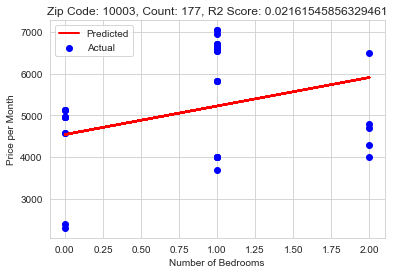

Zip Code: 10003, Count: 177, R2 Score: 0.02161545856329461


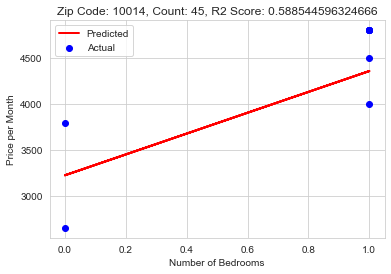

Zip Code: 10014, Count: 45, R2 Score: 0.588544596324666


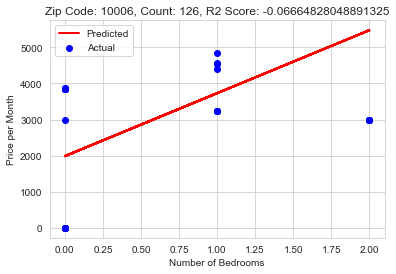

Zip Code: 10006, Count: 126, R2 Score: -0.06664828048891325


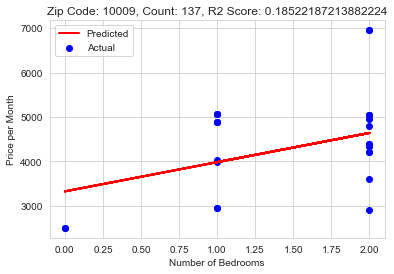

Zip Code: 10009, Count: 137, R2 Score: 0.18522187213882224


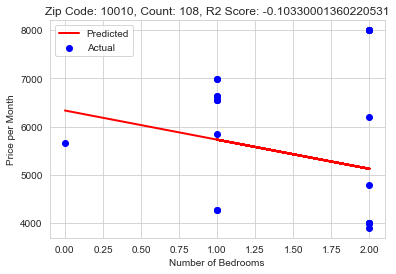

Zip Code: 10010, Count: 108, R2 Score: -0.10330001360220531


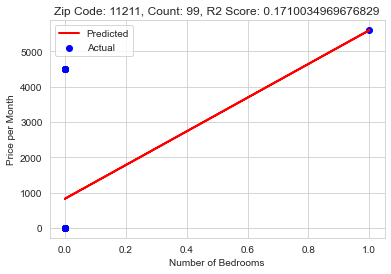

Zip Code: 11211, Count: 99, R2 Score: 0.1710034969676829


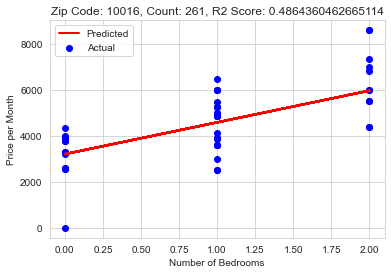

Zip Code: 10016, Count: 261, R2 Score: 0.4864360462665114


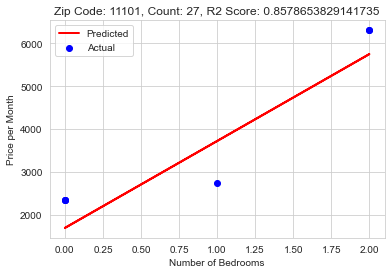

Zip Code: 11101, Count: 27, R2 Score: 0.8578653829141735


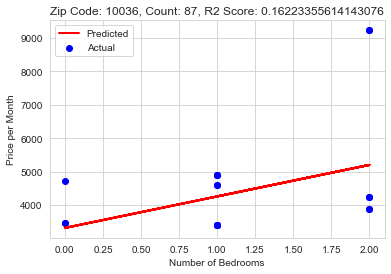

Zip Code: 10036, Count: 87, R2 Score: 0.16223355614143076


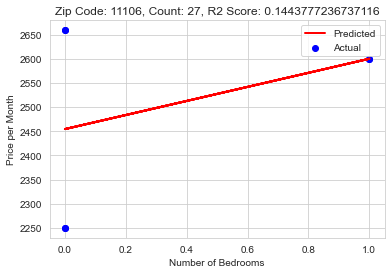

Zip Code: 11106, Count: 27, R2 Score: 0.1443777236737116


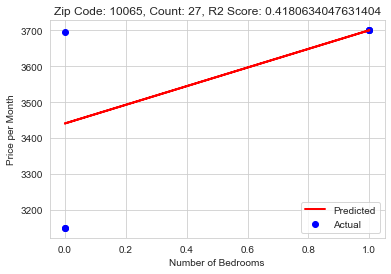

Zip Code: 10065, Count: 27, R2 Score: 0.4180634047631404


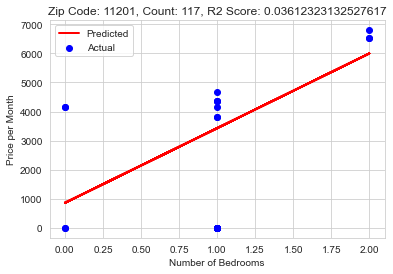

Zip Code: 11201, Count: 117, R2 Score: 0.03612323132527617


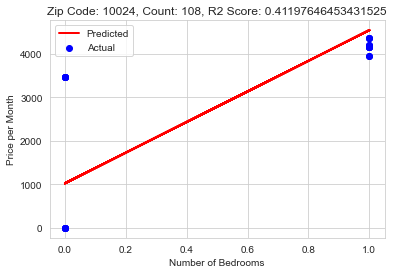

Zip Code: 10024, Count: 108, R2 Score: 0.41197646453431525


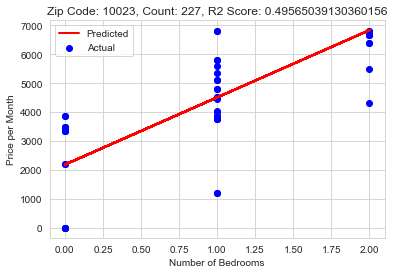

Zip Code: 10023, Count: 227, R2 Score: 0.49565039130360156


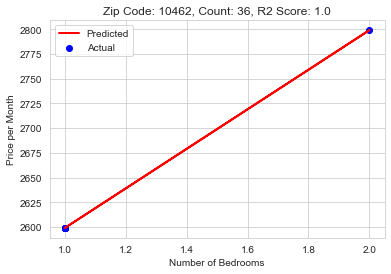

Zip Code: 10462, Count: 36, R2 Score: 1.0


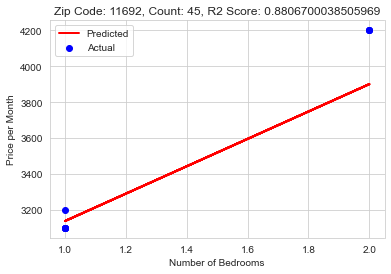

Zip Code: 11692, Count: 45, R2 Score: 0.8806700038505969


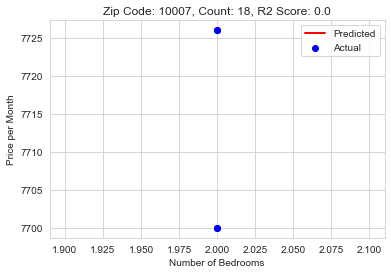

Zip Code: 10007, Count: 18, R2 Score: 0.0


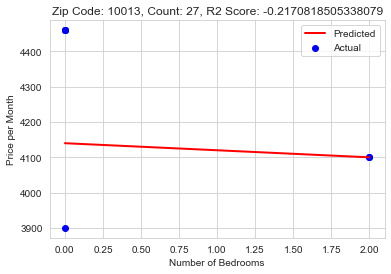

Zip Code: 10013, Count: 27, R2 Score: -0.2170818505338079


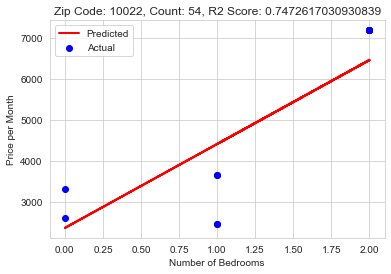

Zip Code: 10022, Count: 54, R2 Score: 0.7472617030930839


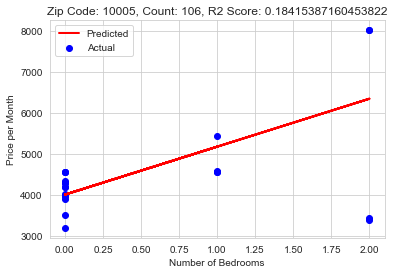

Zip Code: 10005, Count: 106, R2 Score: 0.18415387160453822


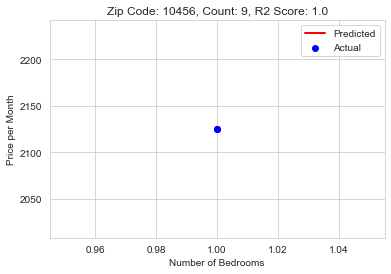

Zip Code: 10456, Count: 9, R2 Score: 1.0


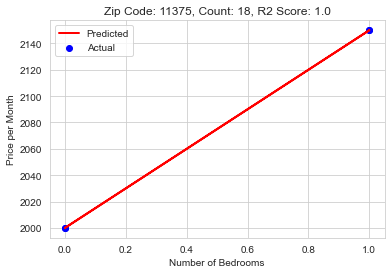

Zip Code: 11375, Count: 18, R2 Score: 1.0


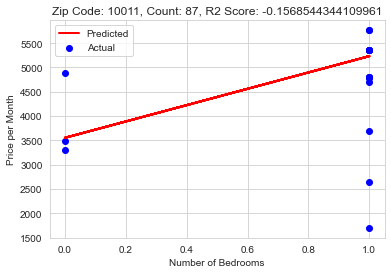

Zip Code: 10011, Count: 87, R2 Score: -0.1568544344109961


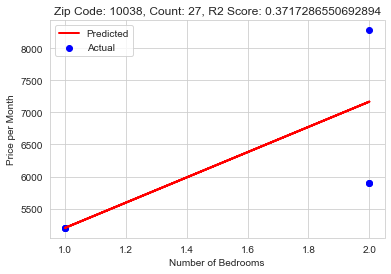

Zip Code: 10038, Count: 27, R2 Score: 0.3717286550692894


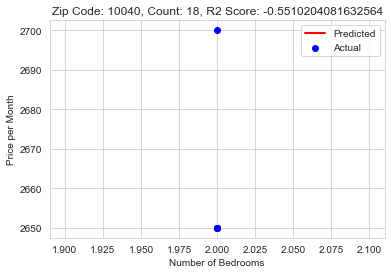

Zip Code: 10040, Count: 18, R2 Score: -0.5510204081632564


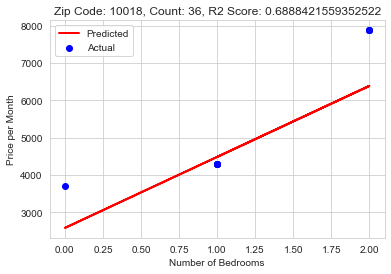

Zip Code: 10018, Count: 36, R2 Score: 0.6888421559352522


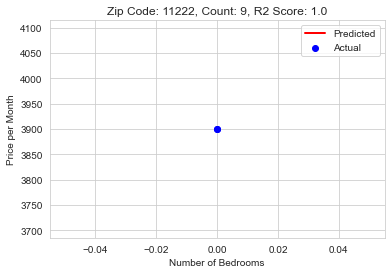

Zip Code: 11222, Count: 9, R2 Score: 1.0


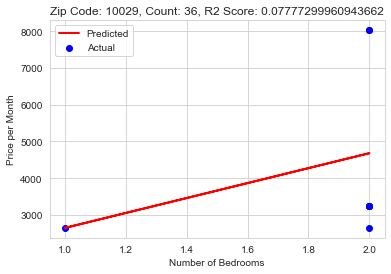

Zip Code: 10029, Count: 36, R2 Score: 0.07777299960943662


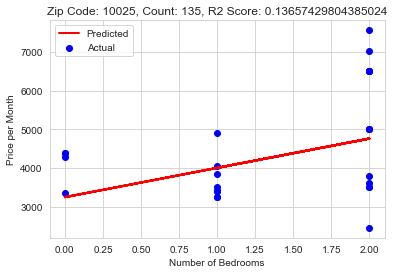

Zip Code: 10025, Count: 135, R2 Score: 0.13657429804385024


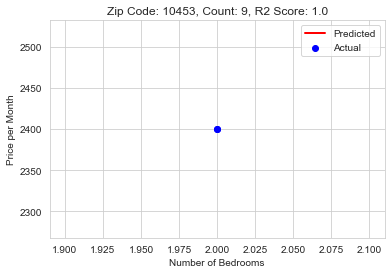

Zip Code: 10453, Count: 9, R2 Score: 1.0


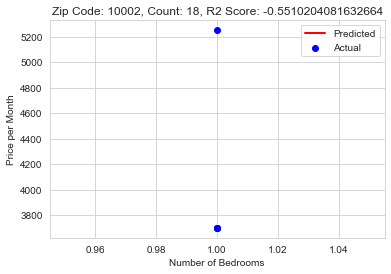

Zip Code: 10002, Count: 18, R2 Score: -0.5510204081632664


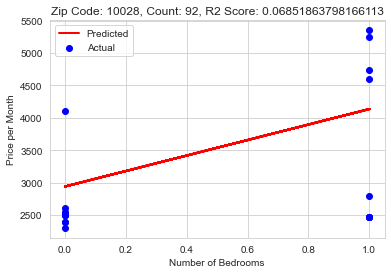

Zip Code: 10028, Count: 92, R2 Score: 0.06851863798166113


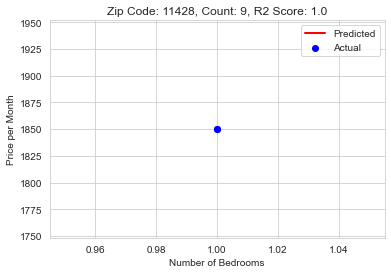

Zip Code: 11428, Count: 9, R2 Score: 1.0


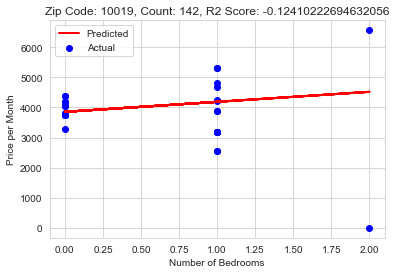

Zip Code: 10019, Count: 142, R2 Score: -0.12410222694632056


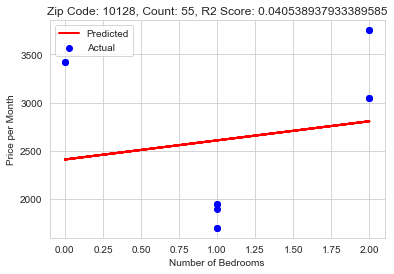

Zip Code: 10128, Count: 55, R2 Score: 0.040538937933389585


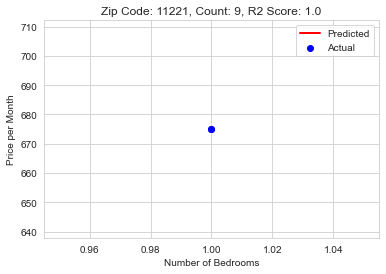

Zip Code: 11221, Count: 9, R2 Score: 1.0


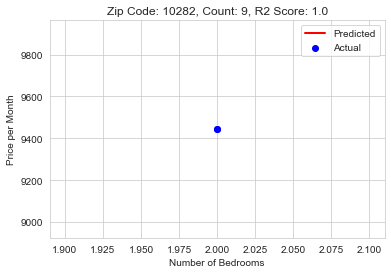

Zip Code: 10282, Count: 9, R2 Score: 1.0


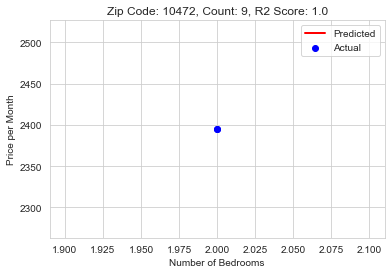

Zip Code: 10472, Count: 9, R2 Score: 1.0


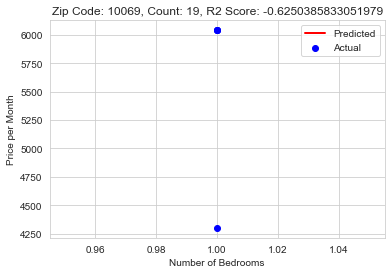

Zip Code: 10069, Count: 19, R2 Score: -0.6250385833051979


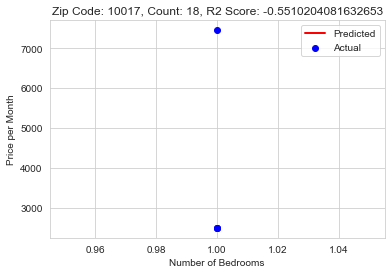

Zip Code: 10017, Count: 18, R2 Score: -0.5510204081632653


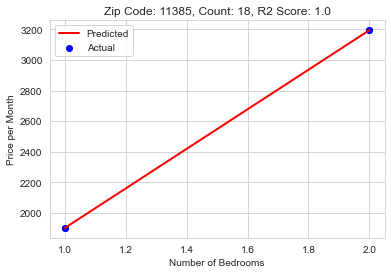

Zip Code: 11385, Count: 18, R2 Score: 1.0


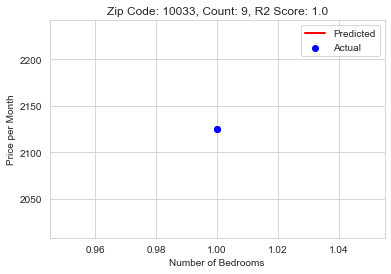

Zip Code: 10033, Count: 9, R2 Score: 1.0


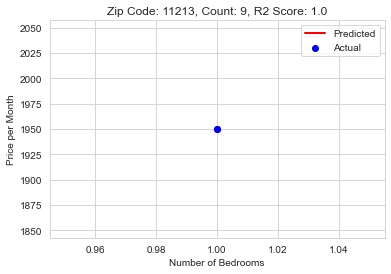

Zip Code: 11213, Count: 9, R2 Score: 1.0


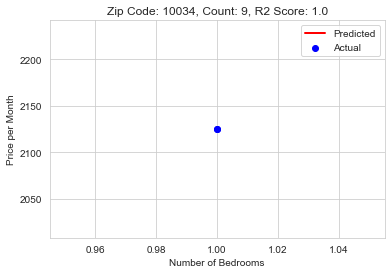

Zip Code: 10034, Count: 9, R2 Score: 1.0


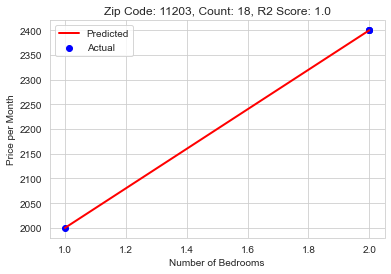

Zip Code: 11203, Count: 18, R2 Score: 1.0


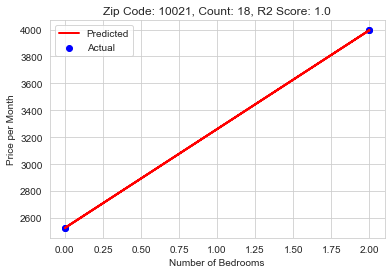

Zip Code: 10021, Count: 18, R2 Score: 1.0


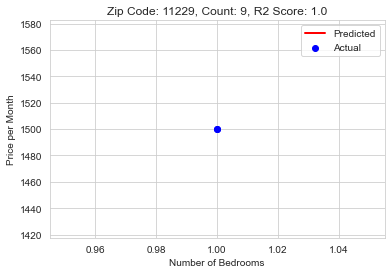

Zip Code: 11229, Count: 9, R2 Score: 1.0


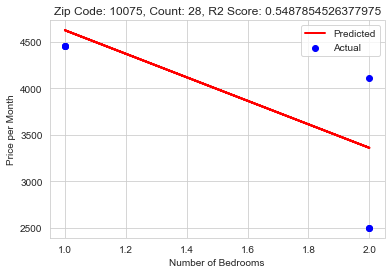

Zip Code: 10075, Count: 28, R2 Score: 0.5487854526377975


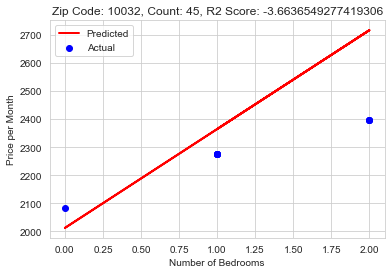

Zip Code: 10032, Count: 45, R2 Score: -3.6636549277419306


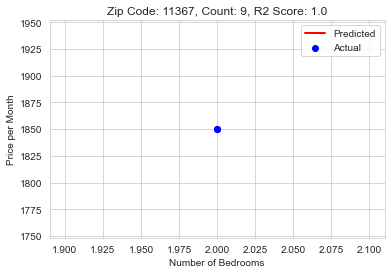

Zip Code: 11367, Count: 9, R2 Score: 1.0


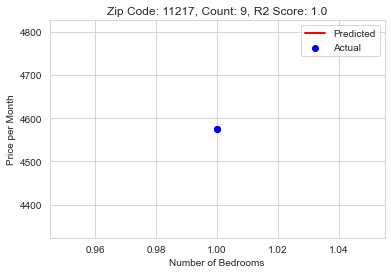

Zip Code: 11217, Count: 9, R2 Score: 1.0


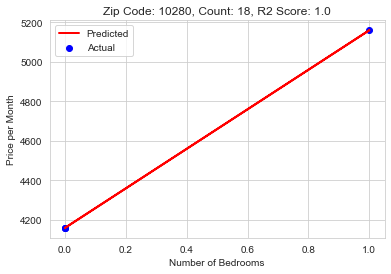

Zip Code: 10280, Count: 18, R2 Score: 1.0


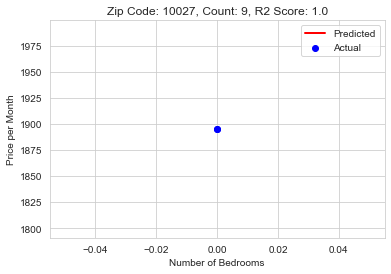

Zip Code: 10027, Count: 9, R2 Score: 1.0


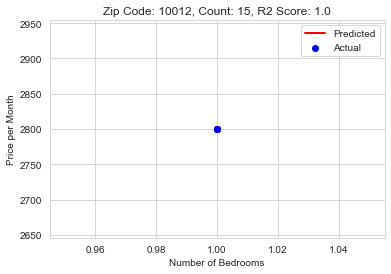

Zip Code: 10012, Count: 15, R2 Score: 1.0


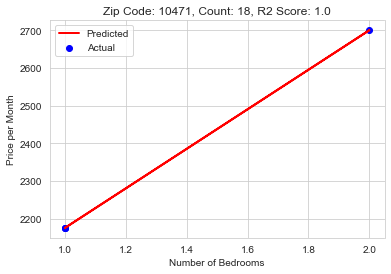

Zip Code: 10471, Count: 18, R2 Score: 1.0


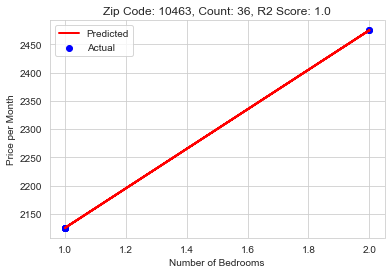

Zip Code: 10463, Count: 36, R2 Score: 1.0


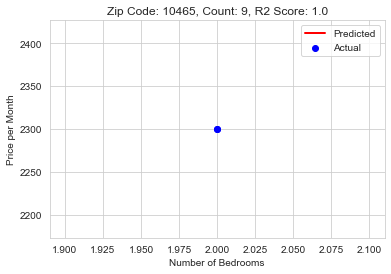

Zip Code: 10465, Count: 9, R2 Score: 1.0


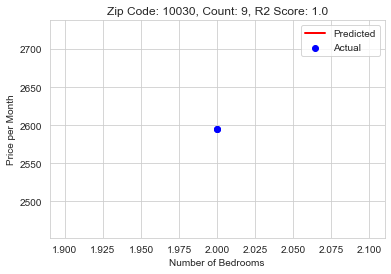

Zip Code: 10030, Count: 9, R2 Score: 1.0


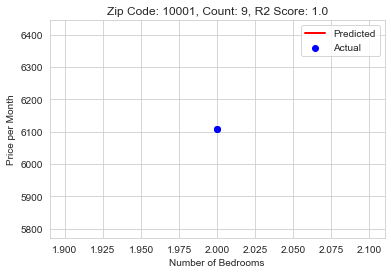

Zip Code: 10001, Count: 9, R2 Score: 1.0


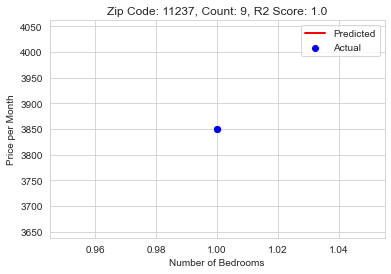

Zip Code: 11237, Count: 9, R2 Score: 1.0


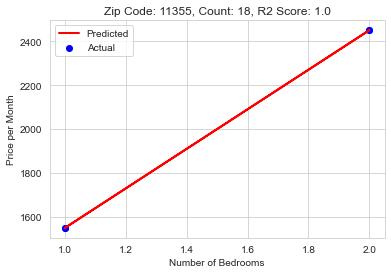

Zip Code: 11355, Count: 18, R2 Score: 1.0


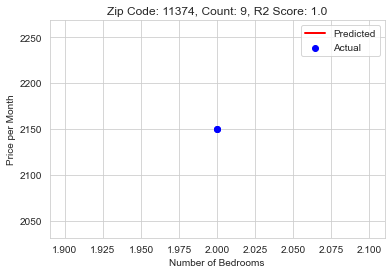

Zip Code: 11374, Count: 9, R2 Score: 1.0


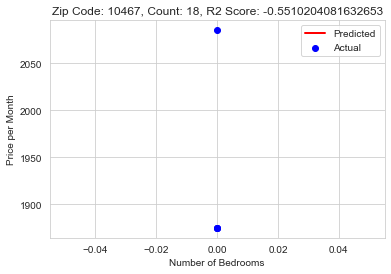

Zip Code: 10467, Count: 18, R2 Score: -0.5510204081632653


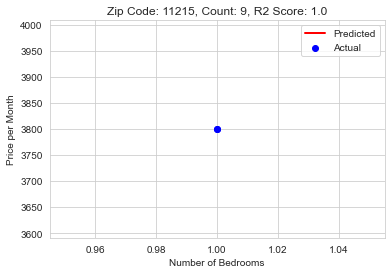

Zip Code: 11215, Count: 9, R2 Score: 1.0


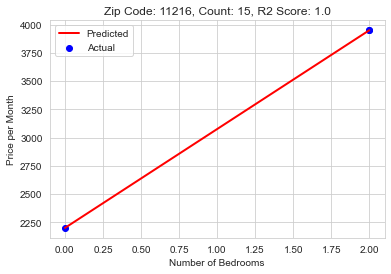

Zip Code: 11216, Count: 15, R2 Score: 1.0


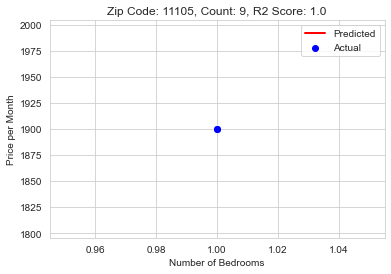

Zip Code: 11105, Count: 9, R2 Score: 1.0


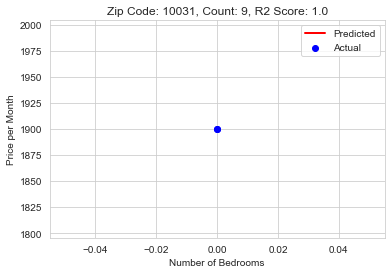

Zip Code: 10031, Count: 9, R2 Score: 1.0


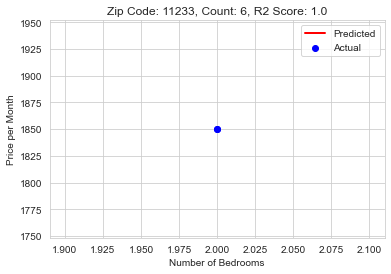

Zip Code: 11233, Count: 6, R2 Score: 1.0


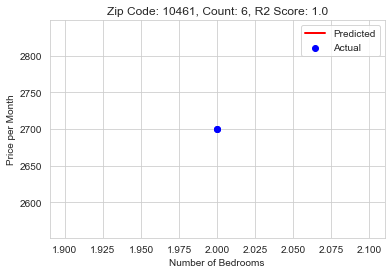

Zip Code: 10461, Count: 6, R2 Score: 1.0


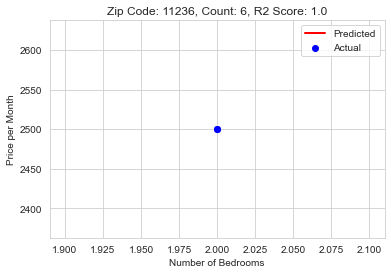

Zip Code: 11236, Count: 6, R2 Score: 1.0


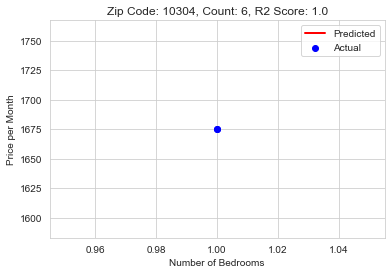

Zip Code: 10304, Count: 6, R2 Score: 1.0


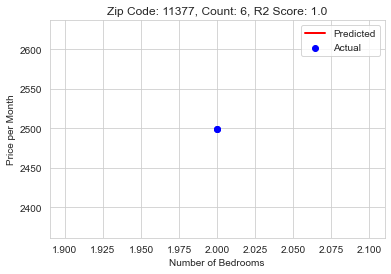

Zip Code: 11377, Count: 6, R2 Score: 1.0


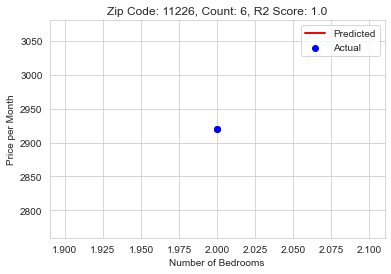

Zip Code: 11226, Count: 6, R2 Score: 1.0


In [96]:
# ---Linear Regression with Number of Bedrooms as the independant---


zipcodes = data['zip'].unique()
r2_values = []

for zipcode in zipcodes:
    subset = df[df['zip'] == zipcode]
    
    # ---check if there are multiple samples for the current zip code---
    if len(subset) > 1:
        # ---spliting into training sets---
        X_train, X_test, y_train, y_test = train_test_split(subset['num_of_beds'], subset['price_per_month'], test_size=0.2)
        # ---create LinearRegression object---
        model = LinearRegression()
        # ---fit the model and reshape it to propersize---
        model.fit(X_train.values.reshape(-1, 1), y_train)
        # ---make the prediction line---
        y_pred = model.predict(X_test.values.reshape(-1, 1))
        # ---calculate the r squared score---
        r2 = r2_score_metric(y_test, y_pred)
        r2_values.append(r2)
        
        # ---count how big each data set is---
        count = subset.shape[0]
        
        # ---plot---
        plt.figure()
        plt.scatter(X_test, y_test, color='blue', label='Actual')
        plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
        plt.title(f"Zip Code: {zipcode}, Count: {count}, R2 Score: {r2}")
        plt.xlabel('Number of Bedrooms')
        plt.ylabel('Price per Month')
        plt.legend()
        plt.show()
        
        print(f"Zip Code: {zipcode}, Count: {count}, R2 Score: {r2}")

In [67]:
# ---zipcodes with highest r squared score 10024 11692 10022 
# ---Zip Code: 10024, Count: 108, R2 Score: 0.7522961072198956
# ---Zip Code: 11692, Count: 45, R2 Score: 0.9173006620171823
# ---Zip Code: 10022, Count: 54, R2 Score: 0.8801382387490493
# ---Zip Code: 10014, Count: 45, R2 Score: 0.7066507619463271

In [68]:

# ---define the boolean columns that contain numbers---
boolean_columns = ['balcony', 'parking', 'patio',
       'island kitchens', 'refrigerator', 'microwave', 'dishwasher', 'deck',
        'view', 'extra storage', 'fitness center','swimming pool',
        'washer & dryer in unit','stainless steel appliances', 'green community']

# ---change to type boolean---
df[boolean_columns] = df[boolean_columns].astype(bool)

# ---remove lines with numeric values in boolean columns---
df = df.dropna(subset=boolean_columns)
df[boolean_columns] = df[boolean_columns].apply(lambda x: pd.to_numeric(x, errors='coerce'))

print(len(df))
display(df.head())

3059


,city,zip,price_per_month,num_of_beds,num_of_baths,size_sqrft,parking,balcony,smoke free,patio,island kitchens,refrigerator,microwave,dishwasher,deck,view,extra storage,fitness center,laundry facility,high speed internet access,swimming pool,ev charging stations,washer & dryer in unit,stainless steel appliances,green community,hardwood flooring,emergency maintenance,short term available,garbage disposal,gas range,public transportation
1,New York,10003,4295,2,1,837,False,False,0,False,False,False,False,True,False,False,False,False,0,0,False,0,False,False,False,1,0,0,0,0,0
2,New York,10003,4035,1,1,674,False,False,0,False,False,False,False,True,False,False,False,False,0,0,False,0,False,False,False,0,0,0,0,0,0
3,New York,10003,2595,0,1,466,False,False,0,False,False,False,False,False,False,False,True,False,0,0,False,0,False,False,False,1,0,0,0,0,0
4,New York,10003,4695,2,2,837,False,False,0,True,False,False,False,True,False,False,False,False,0,0,False,0,False,False,False,1,0,0,0,0,0
5,New York,10003,3200,1,1,674,False,False,0,False,False,False,False,True,False,False,False,False,0,0,False,0,False,False,False,1,0,0,0,0,0


                       Feature  Importance
5                    microwave    0.291537
12      washer & dryer in unit    0.123939
10              fitness center    0.111514
13  stainless steel appliances    0.094148
8                         view    0.082988
1                      parking    0.072010
2                        patio    0.057671
6                   dishwasher    0.055315
9                extra storage    0.052158
11               swimming pool    0.029647
0                      balcony    0.020265
7                         deck    0.006204
4                 refrigerator    0.002603
3              island kitchens    0.000000
14             green community    0.000000


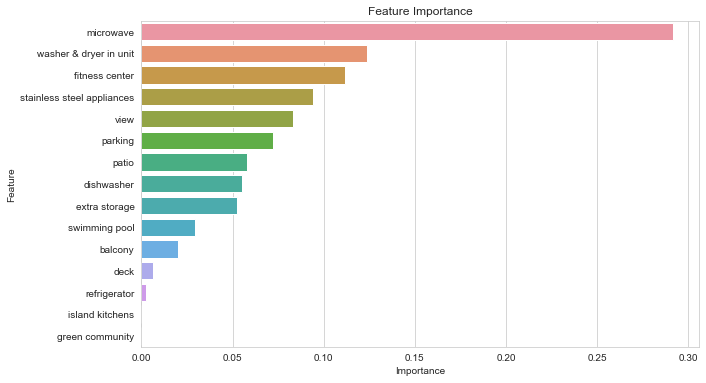

In [69]:
# ---RandomForestRegressor to find most important bollean types---

data_subset = df[boolean_columns + ['price_per_month']].copy()

# ---change boolean to numbers (True: 1, False: 0)---
data_subset[boolean_columns] = data_subset[boolean_columns].astype(int)

# ---split the data into dependant and independant---
X = data_subset[boolean_columns]
y = data_subset['price_per_month']

# ---make an RandomForestRegressor object---
rf = RandomForestRegressor()
rf.fit(X, y)

# ---get the scores---
feature_importances = rf.feature_importances_

# ---make a new data frame---
feature_importance_df = pd.DataFrame({'Feature': boolean_columns, 'Importance': feature_importances})

# ---sort the df---
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# ---plot the df---
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

Zip Code: 10016, Count: 261, R2 Score: -0.37850104426202713


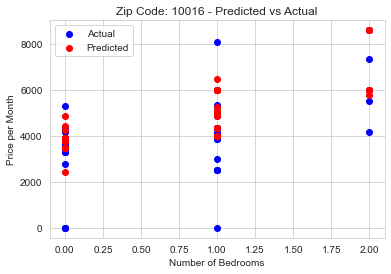

Zip Code: 10023, Count: 227, R2 Score: 0.752917760244352


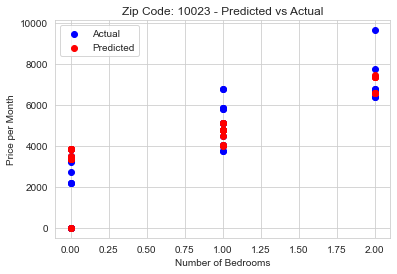

Zip Code: 10003, Count: 177, R2 Score: 0.7411165108371796


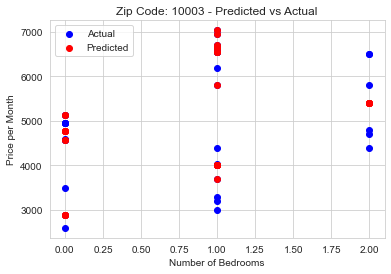

Zip Code: 10019, Count: 142, R2 Score: -0.10963455512162978


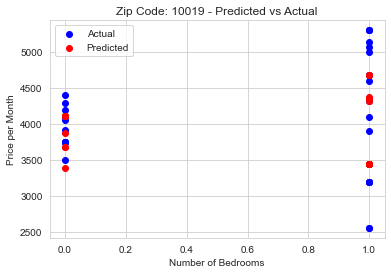

Zip Code: 10009, Count: 137, R2 Score: 0.6244584316680197


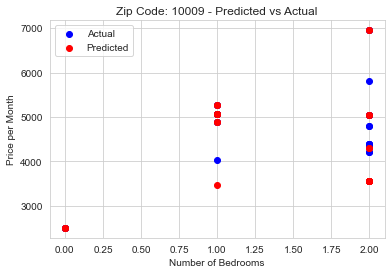

Zip Code: 10025, Count: 135, R2 Score: -0.40736563781279833


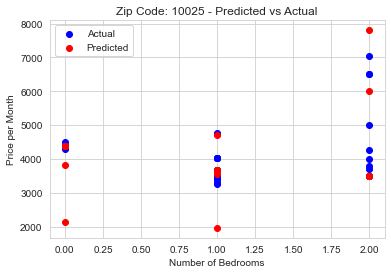

Zip Code: 10006, Count: 126, R2 Score: 0.6386450244979438


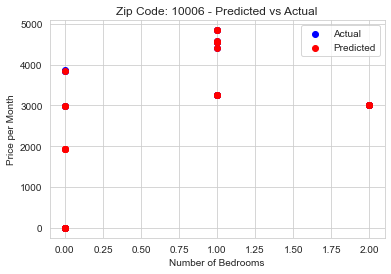

Zip Code: 11201, Count: 117, R2 Score: 0.4196138888036097


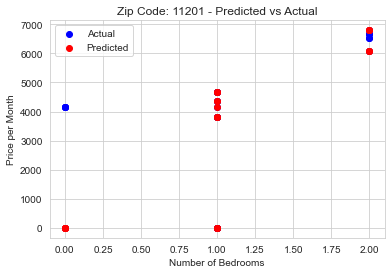

Zip Code: 10010, Count: 108, R2 Score: -0.20276764741154896


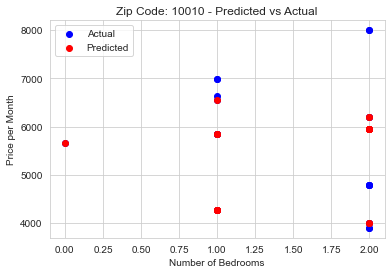

Zip Code: 10024, Count: 108, R2 Score: 0.8847727347137276


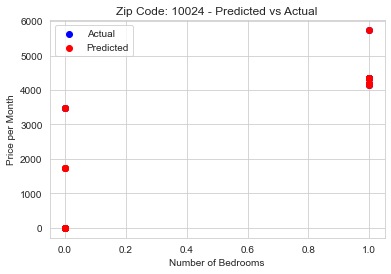

Zip Code: 10005, Count: 106, R2 Score: 0.7712215107199812


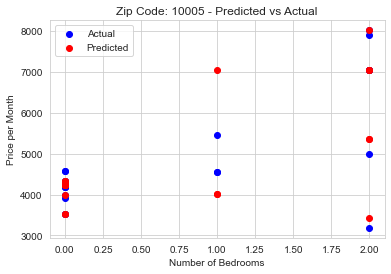

[-0.37850104426202713, 0.752917760244352, 0.7411165108371796, -0.10963455512162978, 0.6244584316680197, -0.40736563781279833, 0.6386450244979438, 0.4196138888036097, -0.20276764741154896, 0.8847727347137276, 0.7712215107199812]


In [97]:
# ---now we can use KNN to take into account the best features and price and try to predict---


best_bool = [ 'microwave', 'washer & dryer in unit', 'fitness center', 'stainless steel appliances', 'view', 'parking']



# ---just like the linear regression model we now split up in zipcodes---
min_zipcode_occurrences = 100
zipcode_counts = df['zip'].value_counts()
valid_zipcodes = zipcode_counts[zipcode_counts >= min_zipcode_occurrences].index

r2_scores = []

for zipcode in valid_zipcodes:
    subset = df[df['zip'] == zipcode]
    
    # ---split the data into dependant and independant---
    X = subset[best_bool + ['num_of_beds','size_sqrft']]
    y = subset['price_per_month']
    
    # ---create training and testing sets---
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # ---create KNeighborsRegressor object---
    k = 2  # Number of neighbors to consider
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    
    # ---create the perdiction
    y_pred = model.predict(X_test)
    
    # ---find the r squared score---
    r2 = r2_score_metric(y_test, y_pred)
    r2_scores.append(r2)
    # ---count how big each data set is---
    count = subset.shape[0]
    print(f"Zip Code: {zipcode}, Count: {count}, R2 Score: {r2}")

    
    # ---plot---
    plt.scatter(X_test['num_of_beds'], y_test, color='blue', label='Actual')
    plt.scatter(X_test['num_of_beds'], y_pred, color='red', label='Predicted')
    plt.title(f"Zip Code: {zipcode} - Predicted vs Actual")
    plt.xlabel('Number of Bedrooms')
    plt.ylabel('Price per Month')
    plt.legend()
    plt.show()

print(r2_scores)

In [ ]:
# ---most accurate zipcodes 
# ---Zip Code: 10024, Count: 108, R2 Score: 0.8866481403193734
# ---Zip Code: 10005, Count: 106, R2 Score: 0.8242206650049364 
# ---Zip Code: 10009, Count: 137, R2 Score: 0.813295707843105
# ---Zip Code: 10003, Count: 177, R2 Score: 0.7019056080034656
# ---Zip Code: 10023, Count: 227, R2 Score: 0.6731975667026389




In [102]:
# ---new aparment data
new_apartment = {
    'microwave': True,
    'washer & dryer in unit': False,
    'fitness center': False,
    'stainless steel appliances': True,
    'view': True,
    'parking': False,
    'num_of_beds': 1,
    'size_sqrft': 662,
    'zip': '10024' 
}

In [103]:
# ---split from zipcodes
subset = df[df['zip'] == new_apartment['zip']]

# ---dependant and independant variables
x_subset = subset[best_bool + ['num_of_beds', 'size_sqrft']]
y_subset = subset['price_per_month']

In [104]:
# ---train the data based on our previous model
model.fit(x_subset, y_subset)

KNeighborsRegressor(n_neighbors=2)

In [105]:
# ---run the prediction model
x_apartment = pd.DataFrame([new_apartment], columns=best_bool + ['num_of_beds', 'size_sqrft'])
predicted_price = model.predict(x_apartment)

print("Predicted Price:", predicted_price)

Predicted Price: [4148.0]
